In [1]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
print("Done!")
import sys
sys.path.append("..")

print("Done!")

Done!
Done!


(60000, 28, 28)
(60000, 784)
(784,)


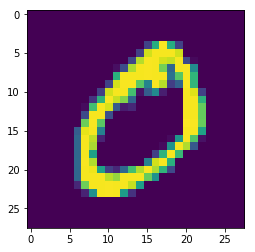

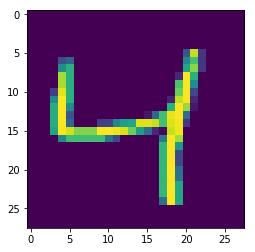

In [320]:

xtrain = np.load("../mnist_xtrain.npy")
print(xtrain.shape)
d = []
for el in xtrain:
    el = el / 255.
    el = utils.flatten(el)
    d.append(el)

d = np.array(d)
print(d.shape)
dat = d[1]
print(dat.shape)
dat = np.reshape(dat, (28,28))
plt.imshow(dat)
plt.show()
plt.imshow(np.reshape(d[2], (28,28)))
plt.show()



(784, 1)
(784, 20)
(20, 1)


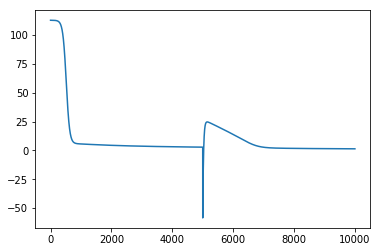

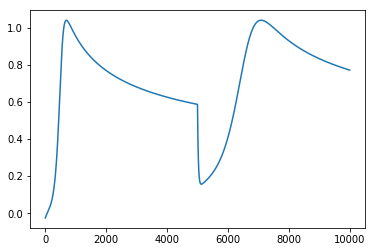

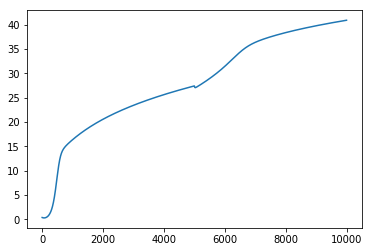

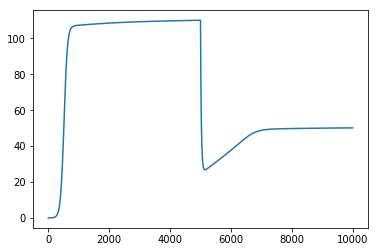

Predictions
flibble!
0.7705263076139828


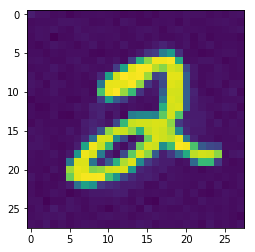

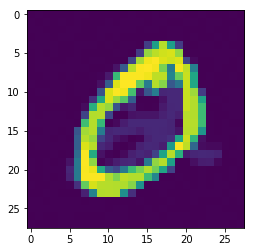

(784, 1)


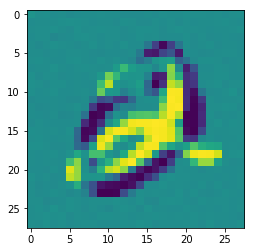

(784, 20)
(784,)


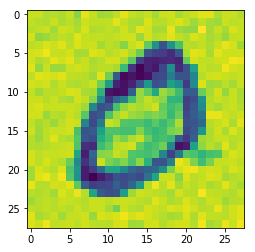

(784,)


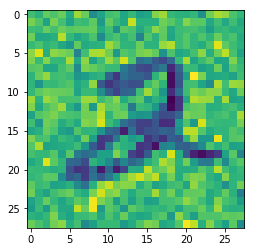

(784,)


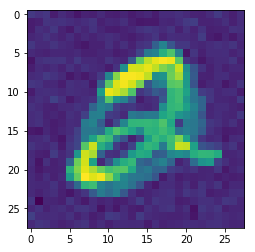

(784,)


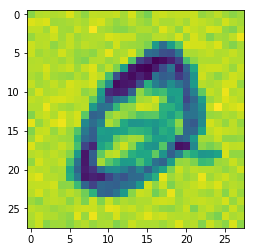

(784,)


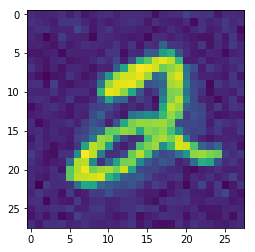

(784,)


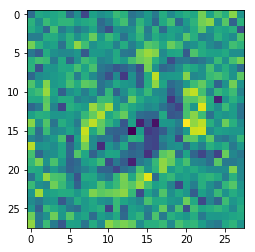

(784,)


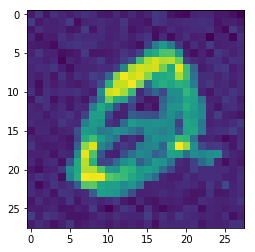

(784,)


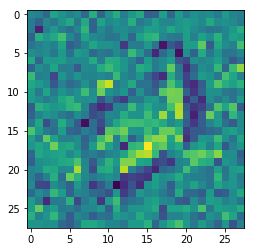

(784,)


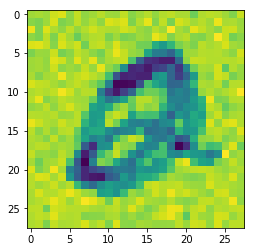

(784,)


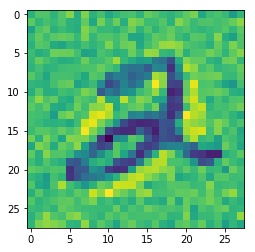

(784,)


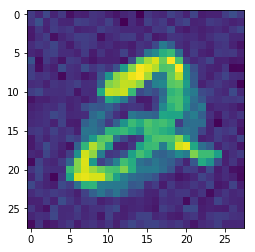

(784,)


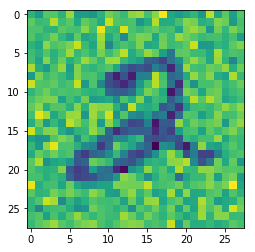

(784,)


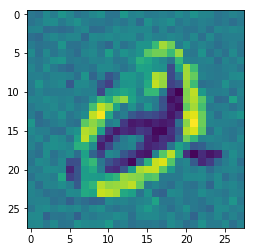

(784,)


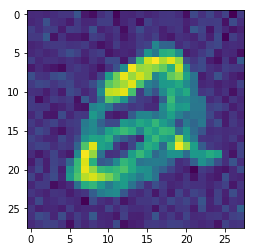

(784,)


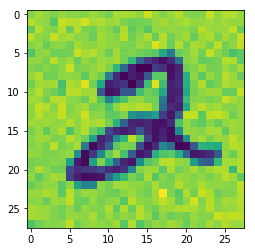

(784,)


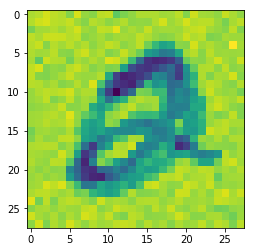

(784,)


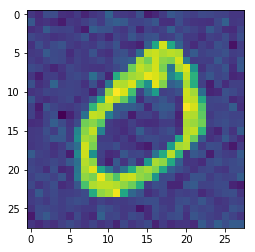

(784,)


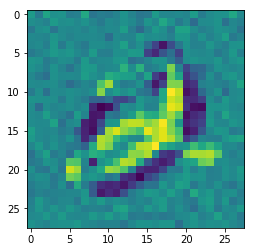

(784,)


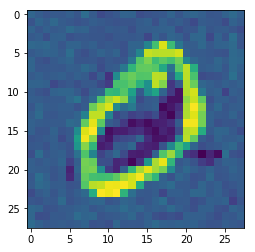

(784,)


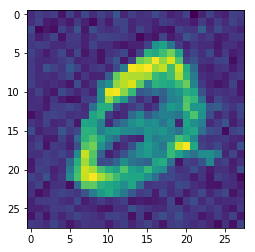

In [49]:

learning_rate = 0.001

def upward_projection(pe, w):
    return np.dot(w.T, pe)

def update_weight(pe, u):
    return learning_rate * np.dot(pe, u.T)
    
def update_cause_unit(bu , pe):
    return learning_rate * np.subtract(bu, pe)

def top_down_prediction(w, td):
    return np.dot(w, td)

def prediction_error(u, pred):
    return np.subtract(u, pred)

def run_layer():
    
    perc1 = np.reshape(d[5], (784,1))
    perc2 = np.reshape(d[2], (784,1))
    perc3 = np.reshape(d[3], (784,1))
    w1 = np.random.normal(0, 0.01, [784, 20])
    u2 = np.random.normal(0, 0.01, [20,1])

    pes = []
    pe2s = []
    weights = []
    preds = []

    print(perc1.shape)
    print(w1.shape)
    print(u2.shape)
    
    for i in range(5000):
        u1 = perc1
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)

        pes.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        weights.append(np.sum(w1))
        preds.append(np.sum(pred))
        
    for i in range(5000):
        u1 = perc2
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)

        pes.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        weights.append(np.sum(w1))
        preds.append(np.sum(pred))
        
    """
    for i in range(500):
        u1 = perc3
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)

        pes.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        weights.append(np.sum(w1))
        preds.append(np.sum(pred))
    """
        
    for i in range(5000):
        u1 = perc1
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        u2 += update_cause_unit(up1, pe2)
    l1 = np.copy(u2)
    
    for i in range(5000):
        u1 = perc2
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        u2 += update_cause_unit(up1, pe2)
    l2 = np.copy(u2)
    
    """
    for i in range(100):
        u1 = perc3
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        u2 += update_cause_unit(up1, pe2)
    l3 = np.copy(u2)
    """
    
    for i in range(5000):
        u2 = l1
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        
        u1 += learning_rate * -1 * pe 
    #print(pred)
    p1 = np.copy(pred)
    lat1 = np.copy(u1)
    
    for i in range(5000):
        u2 = l2
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe 
    #print(pred)
    p2 = np.copy(pred)
    lat2 = np.copy(u1)
    
    """
    for i in range(500):
        u2 = l3
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe # this is just the simplest learning rule of all!
    #print(pred)
    p3 = np.copy(pred)
    lat3 = np.copy(u1)
    """

        


    pes = np.array(pes)
    pe2s = np.array(pe2s)
    weights = np.array(weights)
    preds = np.array(preds)
    plt.plot(pes)
    plt.show()
    plt.plot(pe2s)
    plt.show()
    plt.plot(weights)
    plt.show()
    plt.plot(preds)
    plt.show()
    
    #print("Latents")
    #print(l1)
    #print(l2)
    #print(l3)
    print("Predictions")
    #print(p1)
    #print(p2)
   # print(p3)
    #print("Bottom responses")
    #print(lat1)
    #print(lat2)
    #print(lat3)
    print("flibble!")
    print(pe2s[-1])
    #print(len(pe2s))
    #print(pe2s[999])
    #print(pe2s[900])
    #for i in range(50):
       # print(pe2s[1000+i])
    #print(l2)
    p1 = p1 / np.sum(p1)
    p2 = p2 / np.sum(p2)
    plt.imshow(np.reshape(p1, (28,28)))
    plt.show()
    plt.imshow(np.reshape(p2, (28,28)))
    plt.show()
   
    diff = p1 - p2
    print(diff.shape)
    plt.imshow(np.reshape(diff / np.sum(diff), (28,28)))
   
    plt.show()
    
    print(w1.shape)
    for i in range(20):
        w = w1[:,i]
        print(w.shape)
        w = np.reshape(w, (28,28))
        plt.imshow(w)
        plt.show()
     
run_layer()

0.09581492080115972
0.017946790236963134
(784, 1)
(784, 20)
(20, 1)


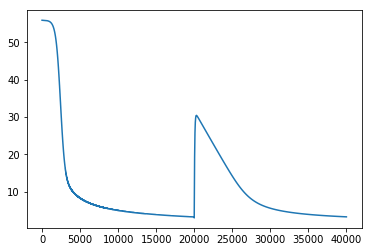

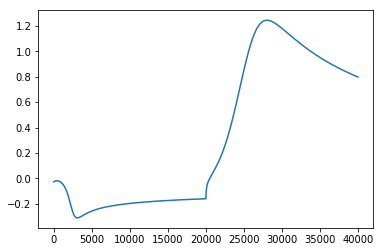

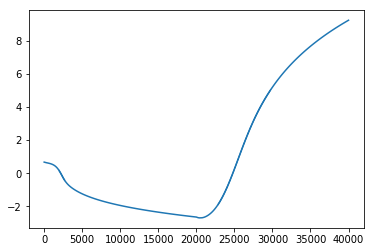

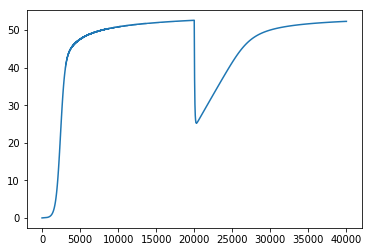

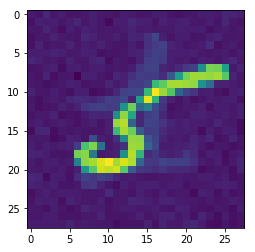

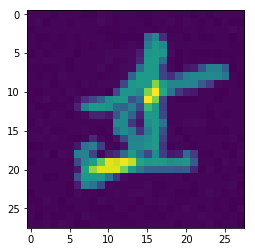

(784, 1)


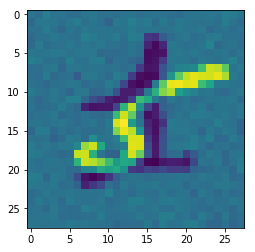

(784, 20)
(784,)


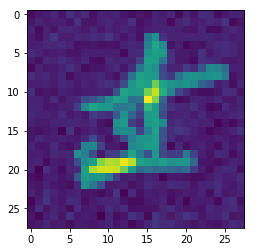

(784,)


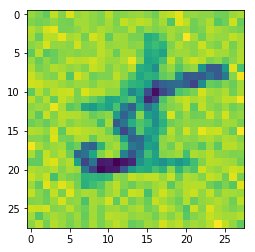

(784,)


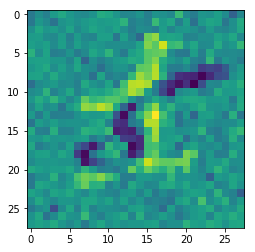

(784,)


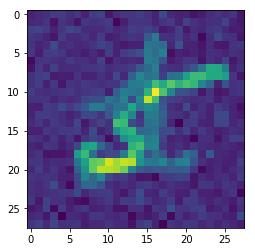

(784,)


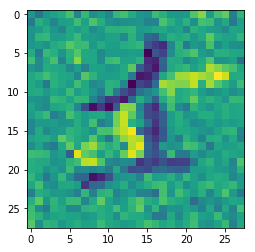

(784,)


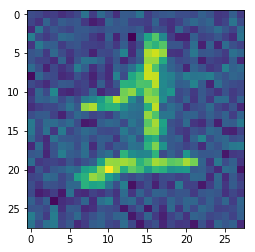

(784,)


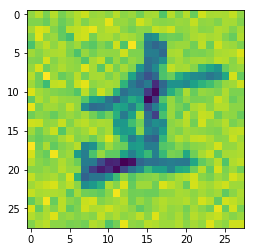

(784,)


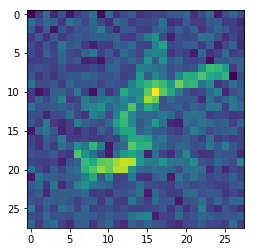

(784,)


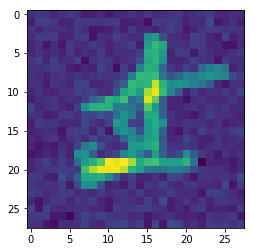

(784,)


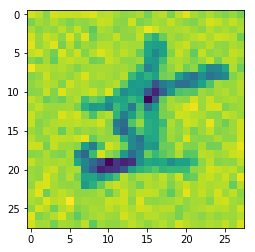

(784,)


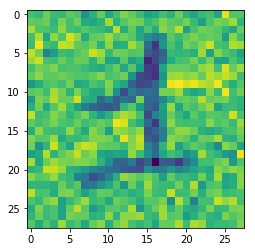

(784,)


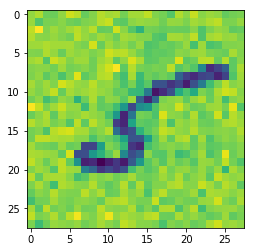

(784,)


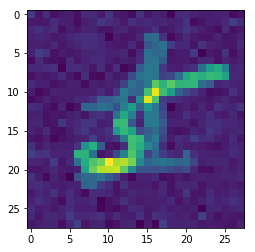

(784,)


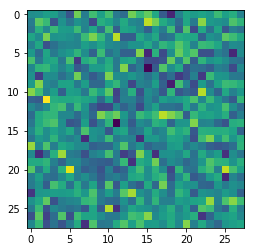

(784,)


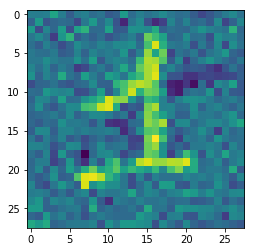

(784,)


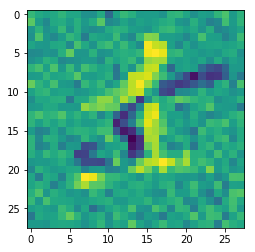

(784,)


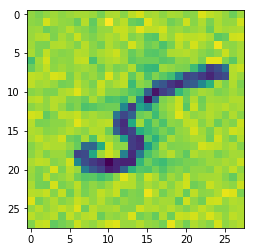

(784,)


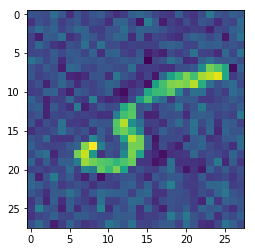

(784,)


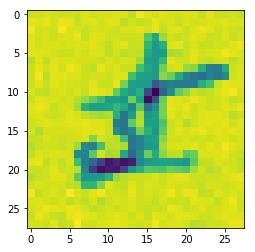

(784,)


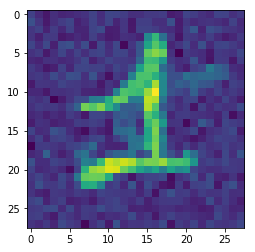

In [87]:
learning_rate = 0.001
weight_update_ratio =10

def upward_projection(pe, w):
    return np.dot(w.T, pe)

def update_weight(pe, u):
    return learning_rate * np.dot(pe, u.T)
    
def update_cause_unit(bu , pe):
    return learning_rate * np.subtract(bu, pe)

def top_down_prediction(w, td):
    return np.dot(w, td)

def prediction_error(u, pred):
    return np.subtract(u, pred)

def run_layer():
    print(np.mean(d[5]))
    print(np.mean(d[2]))
    
    perc1 = np.reshape(d[11], (784,1))
    perc2 = np.reshape(d[24], (784,1))
    perc3 = np.reshape(d[3], (784,1))
    w1 = np.random.normal(0, 0.01, [784, 20])
    u2 = np.random.normal(0, 0.01, [20,1])

    pes = []
    pe2s = []
    weights = []
    preds = []

    #percept = np.reshape(percept, (2,1))
    #u2 = np.reshape(u2, (2,1))
    print(perc1.shape)
    print(w1.shape)
    print(u2.shape)
    
    for i in range(20000):
        u1 = perc1
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        #w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        if i % weight_update_ratio == 0:
            w1 += update_weight(pe1, u2)

        pes.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        weights.append(np.sum(w1))
        preds.append(np.sum(pred))
        
    for i in range(20000):
        u1 = perc2
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        #w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        if i % weight_update_ratio == 0:
            w1 += update_weight(pe1, u2)

        pes.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        weights.append(np.sum(w1))
        preds.append(np.sum(pred))
        
    """
    for i in range(500):
        u1 = perc3
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)

        pes.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        weights.append(np.sum(w1))
        preds.append(np.sum(pred))
    """
        
    for i in range(5000):
        u1 = perc1
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        u2 += update_cause_unit(up1, pe2)
    l1 = np.copy(u2)
    
    for i in range(5000):
        u1 = perc2
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        u2 += update_cause_unit(up1, pe2)
    l2 = np.copy(u2)
    
    """
    for i in range(100):
        u1 = perc3
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        u2 += update_cause_unit(up1, pe2)
    l3 = np.copy(u2)
    """
    
    for i in range(5000):
        u2 = l1
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        
        u1 += learning_rate * -1 * pe 
    #print(pred)
    p1 = np.copy(pred)
    lat1 = np.copy(u1)
    
    for i in range(5000):
        u2 = l2
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe 
    #print(pred)
    p2 = np.copy(pred)
    lat2 = np.copy(u1)
    
    """
    for i in range(500):
        u2 = l3
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe # this is just the simplest learning rule of all!
    #print(pred)
    p3 = np.copy(pred)
    lat3 = np.copy(u1)
    """

    pes = np.array(pes)
    pe2s = np.array(pe2s)
    weights = np.array(weights)
    preds = np.array(preds)
    plt.plot(pes)
    plt.show()
    plt.plot(pe2s)
    plt.show()
    plt.plot(weights)
    plt.show()
    plt.plot(preds)
    plt.show()
    
    p1 = p1 
    p2 = p2 
    plt.imshow(np.reshape(p1, (28,28)))
    plt.show()
    plt.imshow(np.reshape(p2, (28,28)))
    plt.show()

    diff = p1 - p2
    print(diff.shape)
    plt.imshow(np.reshape(diff / np.sum(diff), (28,28)))
    plt.show()
    
    print(w1.shape)
    for i in range(20):
        w = w1[:,i]
        print(w.shape)
        w = np.reshape(w, (28,28))
        plt.imshow(w)
        plt.show()
        
run_layer()

(60000, 28, 28)


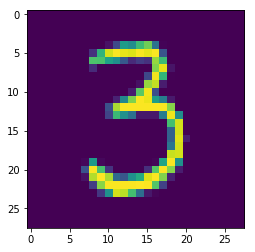

(60000, 784)


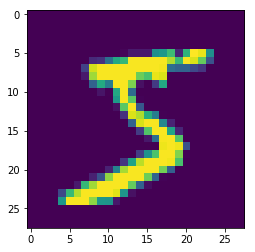

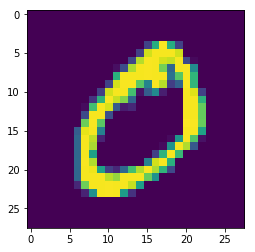

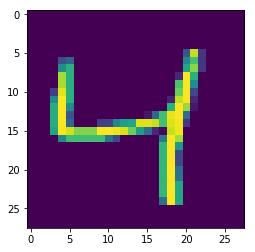

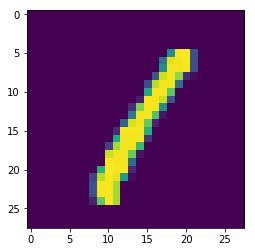

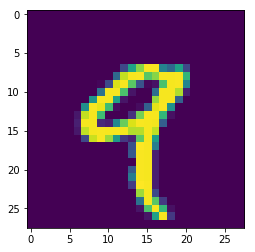

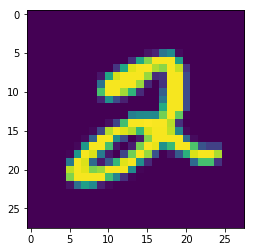

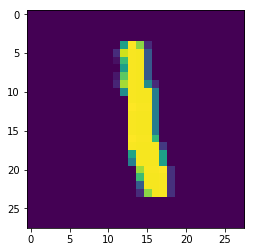

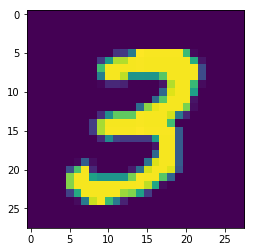

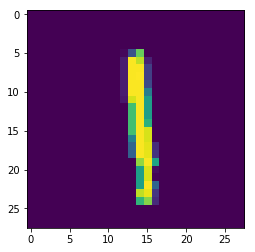

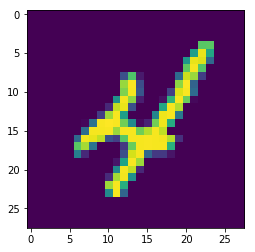

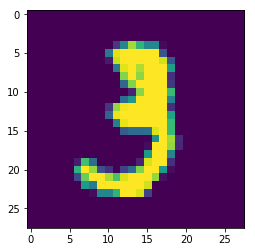

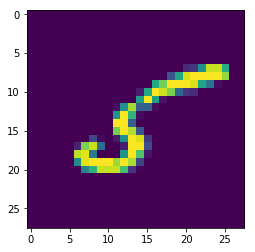

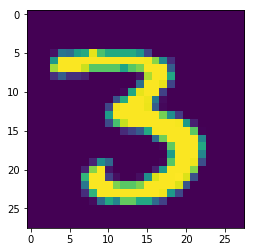

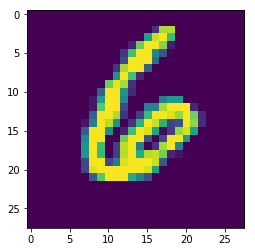

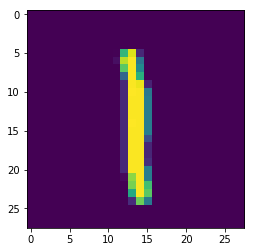

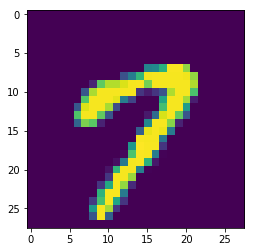

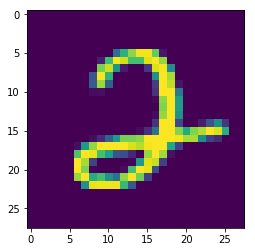

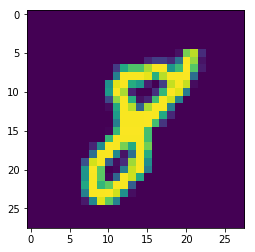

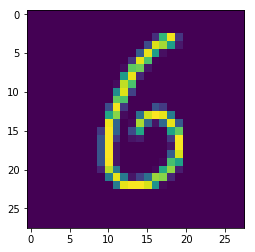

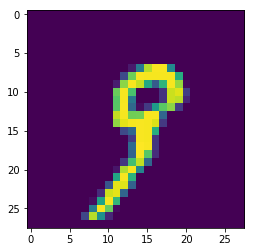

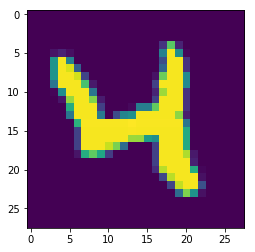

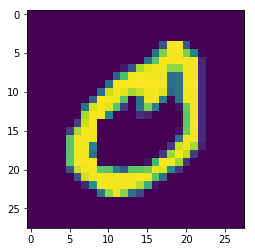

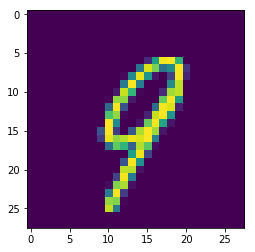

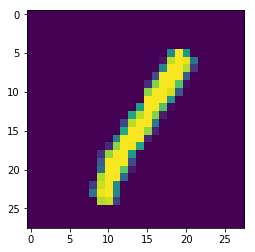

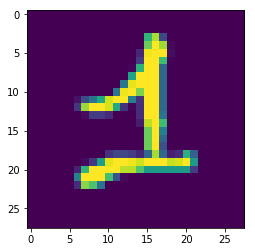

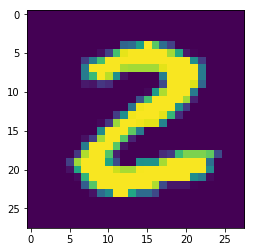

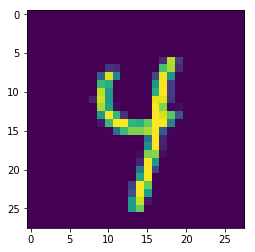

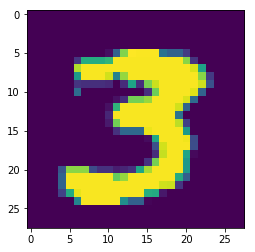

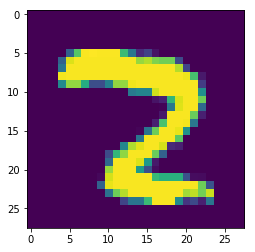

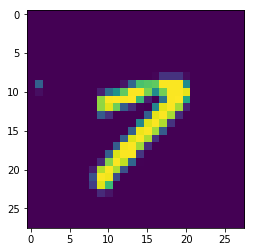

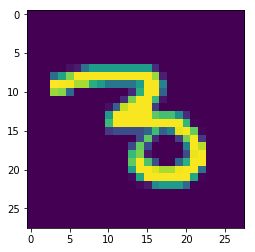

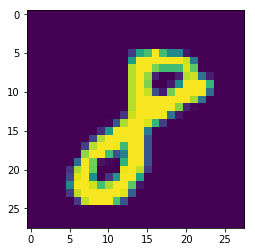

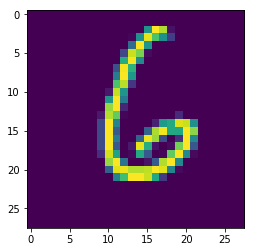

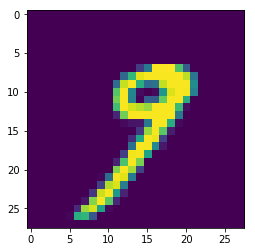

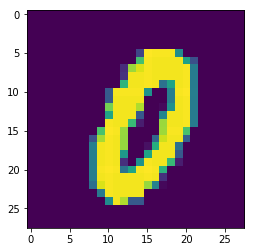

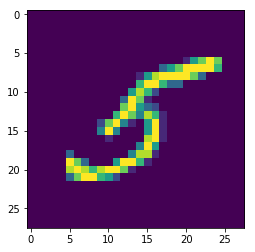

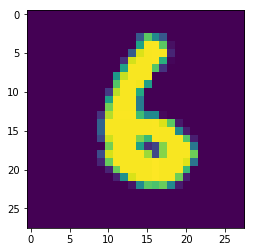

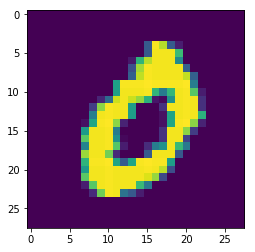

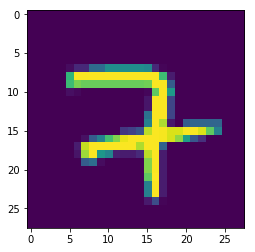

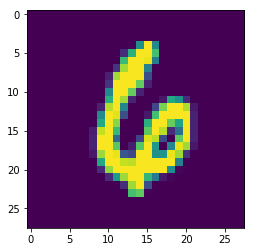

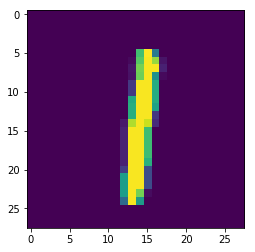

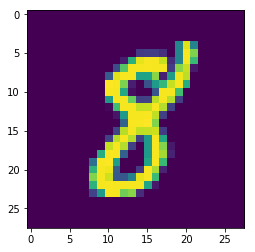

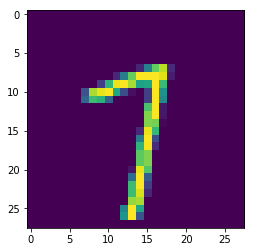

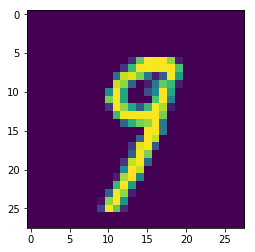

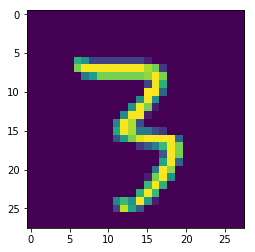

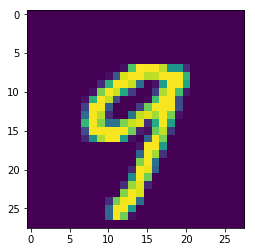

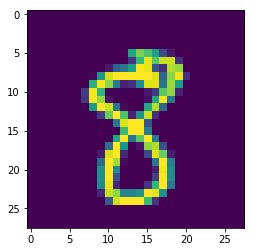

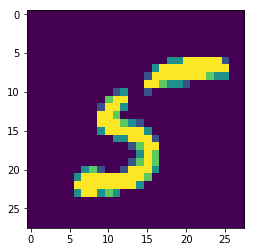

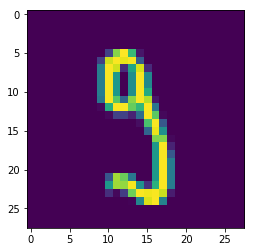

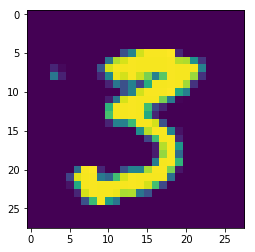

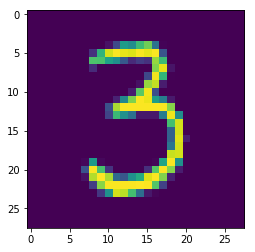

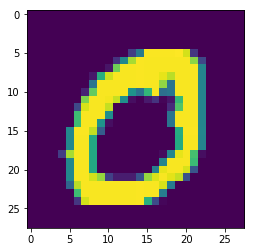

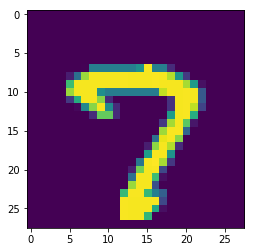

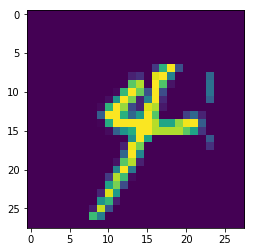

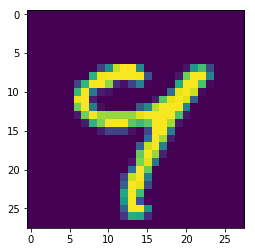

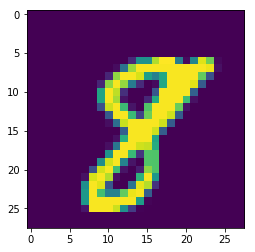

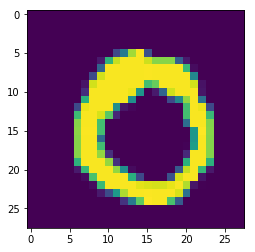

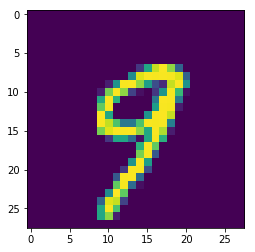

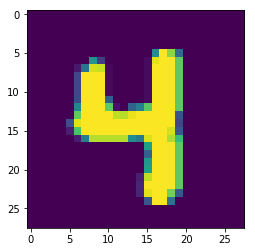

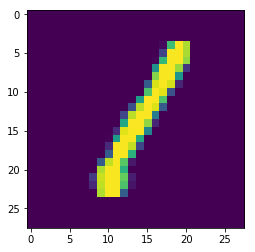

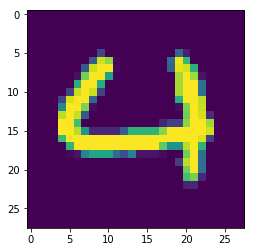

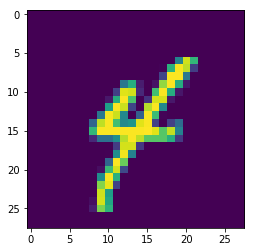

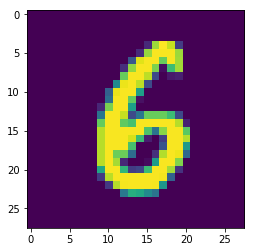

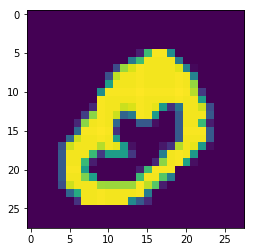

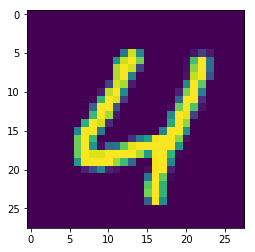

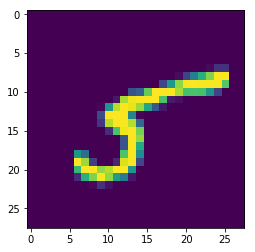

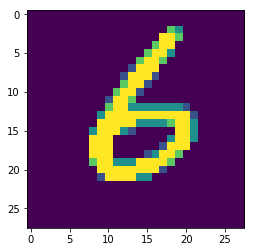

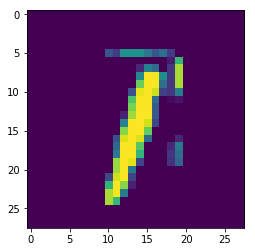

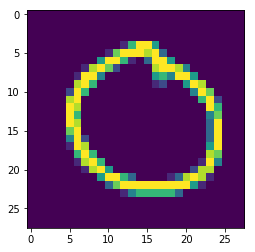

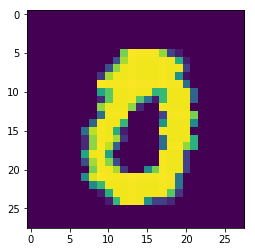

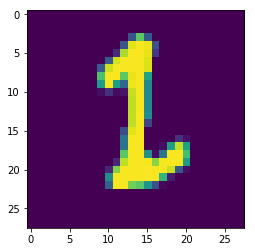

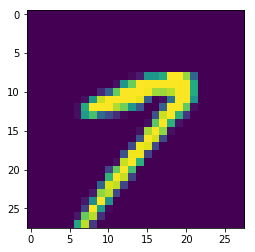

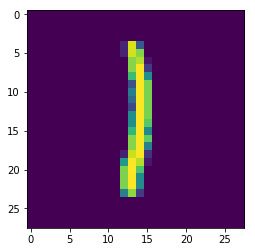

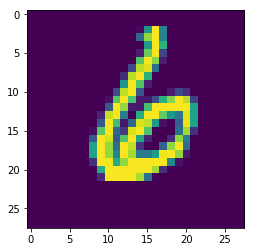

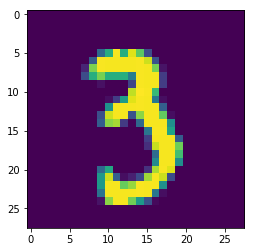

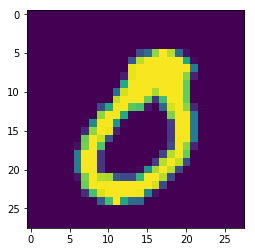

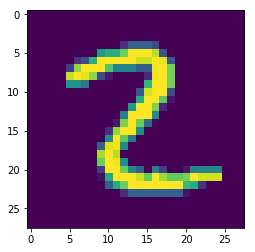

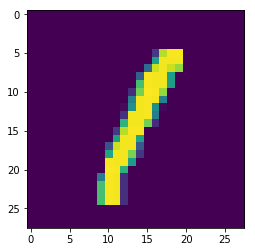

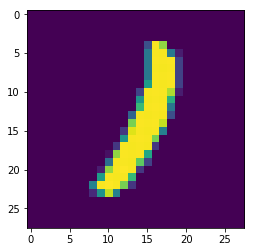

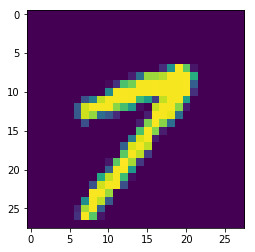

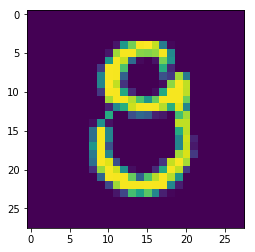

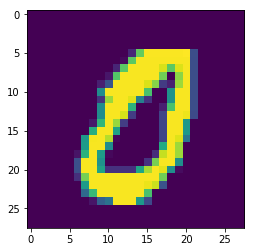

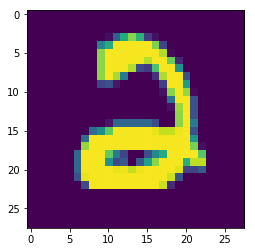

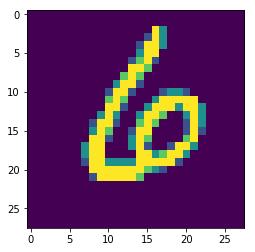

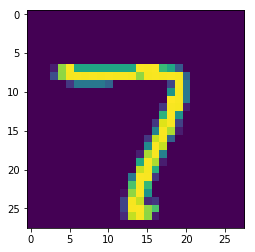

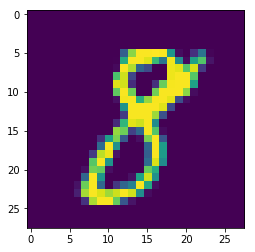

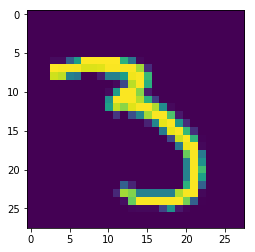

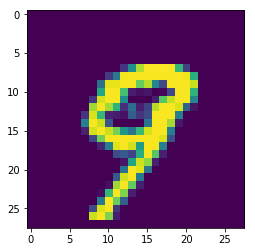

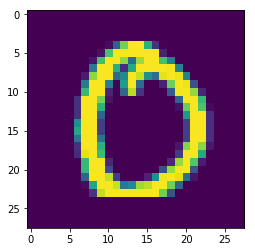

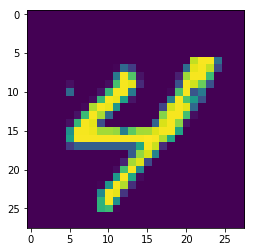

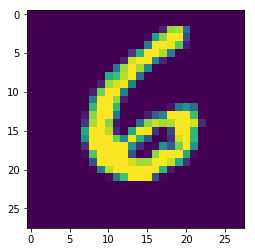

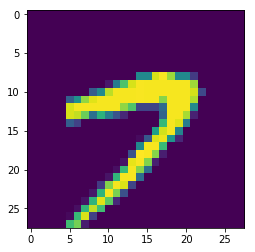

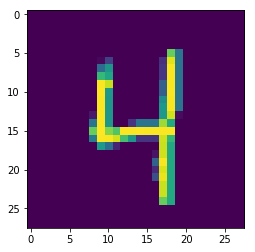

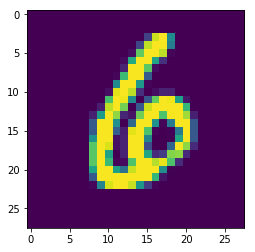

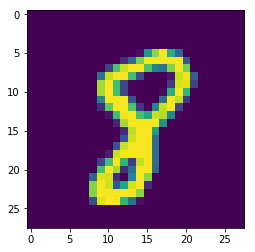

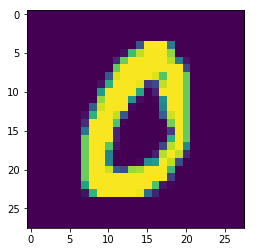

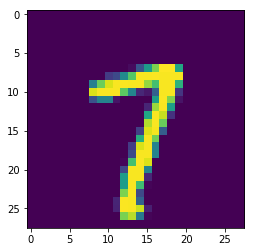

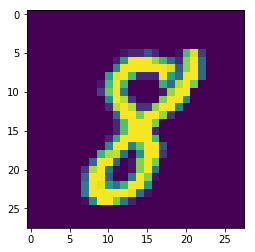

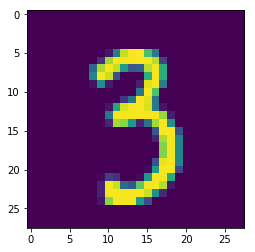

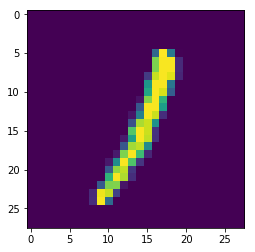

In [114]:
print(xtrain.shape)
plt.imshow(xtrain[50])
plt.show()
print(d.shape)
for i in range(100):
    plt.imshow(np.reshape(d[i], (28,28)))
    plt.show()
    

In [ ]:
xtrain = np.load("../mnist_xtrain.npy")
print(xtrain.shape)
d = []
for el in xtrain:
    el = el / 255.
    el = utils.flatten(el)
    d.append(el)

d = np.array(d)
#print(d.shape)
#d#at = d[1]
#print(dat.shape)
#dat = np.reshape(dat, (28,28))
#plt.imshow(dat)
#plt.show()
#plt.imshow(np.reshape(d[2], (28,28)))
#plt.show()

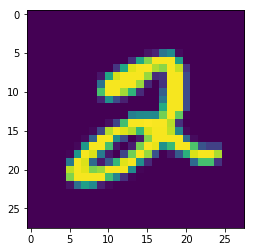

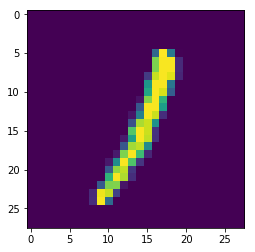

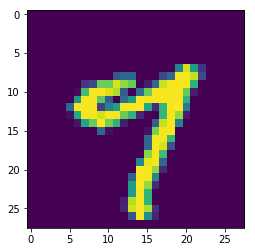

Results
(784, 1)
(784, 20)
(20, 1)


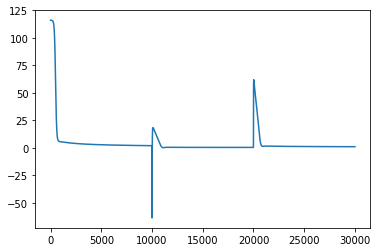

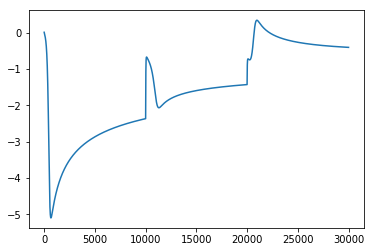

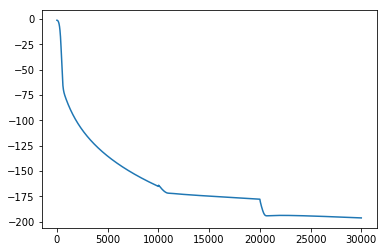

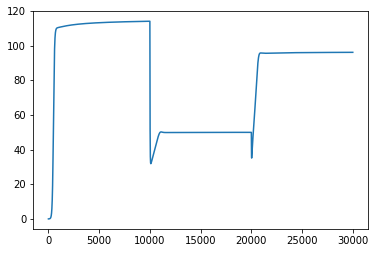

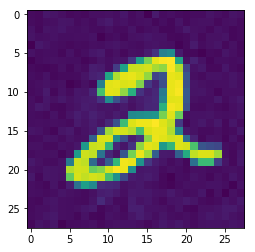

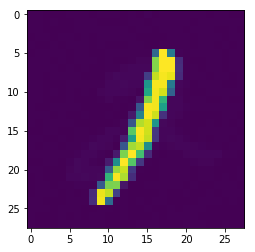

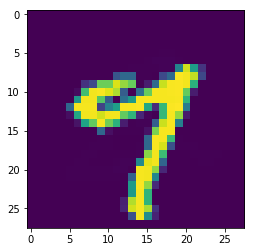

(784, 1)


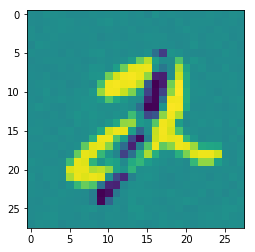

(784, 20)
(784,)


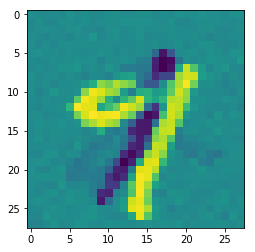

(784,)


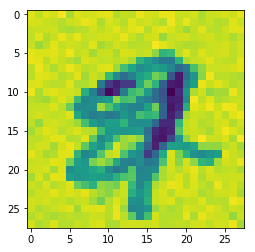

(784,)


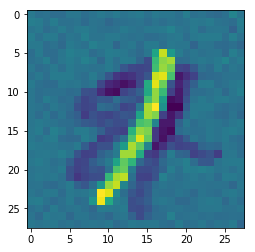

(784,)


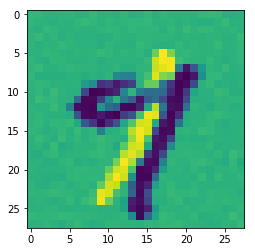

(784,)


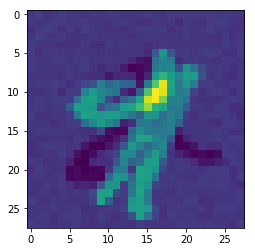

(784,)


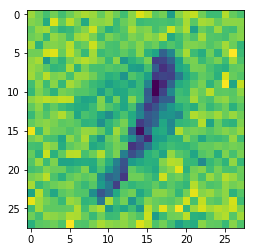

(784,)


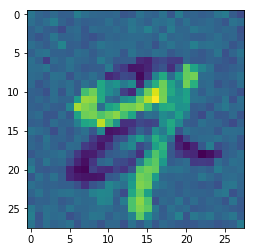

(784,)


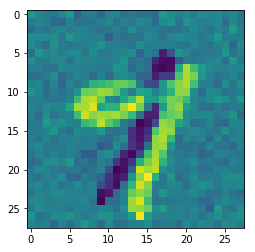

(784,)


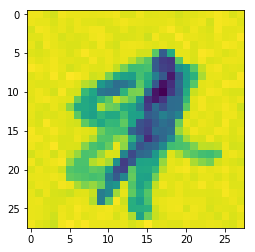

(784,)


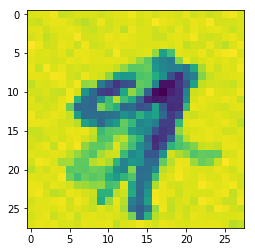

(784,)


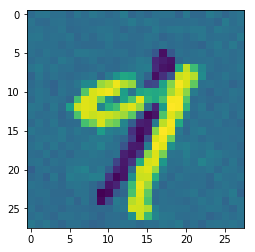

(784,)


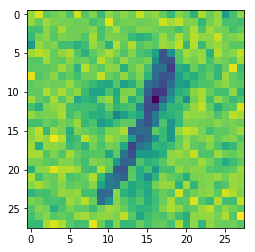

(784,)


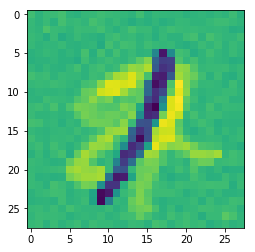

(784,)


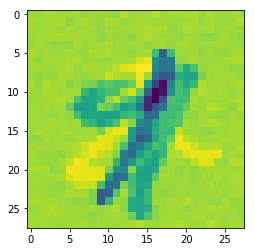

(784,)


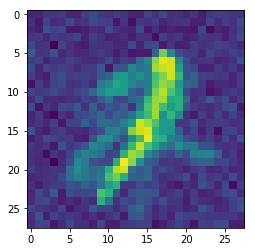

(784,)


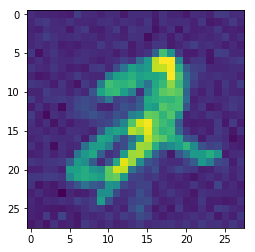

(784,)


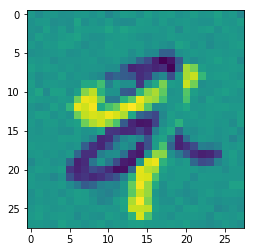

(784,)


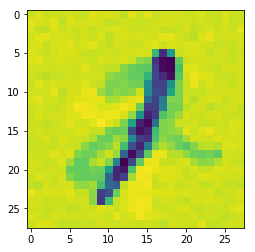

(784,)


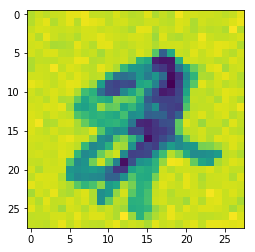

(784,)


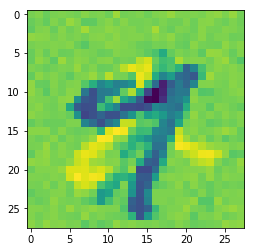

In [126]:
learning_rate = 0.001
weight_update_ratio =1

def upward_projection(pe, w):
    return np.dot(w.T, pe)

def update_weight(pe, u):
    return learning_rate * np.dot(pe, u.T)
    
def update_cause_unit(bu , pe):
    return learning_rate * np.subtract(bu, pe)

def top_down_prediction(w, td):
    return np.dot(w, td)

def prediction_error(u, pred):
    return np.subtract(u, pred)

def run_layer(i,j,k):    
    epochs = 10000
    
    perc1 = np.reshape(d[i], (784,1))
    perc2 = np.reshape(d[j], (784,1))
    perc3 = np.copy(np.reshape(d[k], (784,1)))
    
    percs = [perc1, perc2, perc3]
    w1 = np.random.normal(0, 0.01, [784, 20])
    u2 = np.random.normal(0, 0.01, [20,1])
    
    plt.imshow(np.reshape(perc1, (28,28)))
    plt.show()
    plt.imshow(np.reshape(perc2, (28,28)))
    plt.show()
    plt.imshow(np.reshape(perc3, (28,28)))
    plt.show()
    
    print("Results")

    pes = []
    pe2s = []
    weights = []
    preds = []

    #percept = np.reshape(percept, (2,1))
    #u2 = np.reshape(u2, (2,1))
    print(perc1.shape)
    print(w1.shape)
    print(u2.shape)

    
    """
    for perc in percs:
        for i in range(epochs):
            u1 = perc
            pred = top_down_prediction(w1, u2)
            pe1 = prediction_error(u1, pred)
            up1 = upward_projection(pe1, w1)
            pe2 = prediction_error(u2, 0)
            #w1 += update_weight(pe1, u2)
            u2 += update_cause_unit(up1, pe2)
            if i % weight_update_ratio == 0:
                w1 += update_weight(pe1, u2)

            pes.append(np.sum(pe1))
            pe2s.append(np.sum(pe2))
            weights.append(np.sum(w1))
            preds.append(np.sum(pred))
    """
    
    for i in range(10000):
        u1 = perc1
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        #w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        if i % weight_update_ratio == 0:
            w1 += update_weight(pe1, u2)

        pes.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        weights.append(np.sum(w1))
        preds.append(np.sum(pred))
        
    for i in range(10000):
        u1 = perc2
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        #w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)
        if i % weight_update_ratio == 0:
            w1 += update_weight(pe1, u2)

        pes.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        weights.append(np.sum(w1))
        preds.append(np.sum(pred))
        
        
    
    for i in range(10000):
        u1 = perc3
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(pe1, u2)
        u2 += update_cause_unit(up1, pe2)

        pes.append(np.sum(pe1))
        pe2s.append(np.sum(pe2))
        weights.append(np.sum(w1))
        preds.append(np.sum(pred))
    
        
    for i in range(500):
        u1 = perc1
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        u2 += update_cause_unit(up1, pe2)
    l1 = np.copy(u2)
    
    for i in range(500):
        u1 = perc2
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        u2 += update_cause_unit(up1, pe2)
    l2 = np.copy(u2)
    
    
    for i in range(500):
        u1 = perc3
        pred = top_down_prediction(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(pe1, w1)
        pe2 = prediction_error(u2, 0)
        u2 += update_cause_unit(up1, pe2)
    l3 = np.copy(u2)
    
    
    for i in range(500):
        u2 = l1
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        
        u1 += learning_rate * -1 * pe 
    #print(pred)
    p1 = np.copy(pred)
    lat1 = np.copy(u1)
    
    for i in range(500):
        u2 = l2
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe 
    #print(pred)
    p2 = np.copy(pred)
    lat2 = np.copy(u1)
    
    
    for i in range(500):
        u2 = l3
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe #
    p3 = np.copy(pred)
    lat3 = np.copy(u1)
    

    pes = np.array(pes)
    pe2s = np.array(pe2s)
    weights = np.array(weights)
    preds = np.array(preds)
    plt.plot(pes)
    plt.show()
    plt.plot(pe2s)
    plt.show()
    plt.plot(weights)
    plt.show()
    plt.plot(preds)
    plt.show()
    
    p1 = p1 
    p2 = p2 
    plt.imshow(np.reshape(p1, (28,28)))
    plt.show()
    plt.imshow(np.reshape(p2, (28,28)))
    plt.show()
    plt.imshow(np.reshape(p3, (28,28)))
    plt.show()

    diff = p1 - p2
    print(diff.shape)
    plt.imshow(np.reshape(diff / np.sum(diff), (28,28)))
    plt.show()
    
    print(w1.shape)
    for i in range(20):
        w = w1[:,i]
        print(w.shape)
        w = np.reshape(w, (28,28))
        plt.imshow(w)
        plt.show()
        
run_layer(5,99,172)


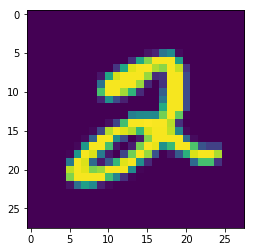

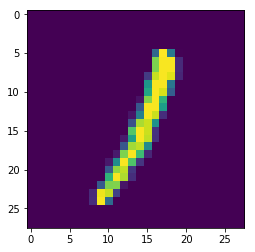

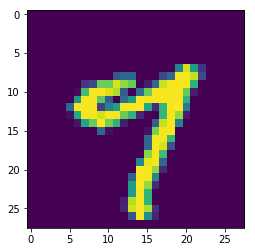

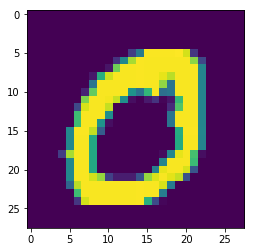

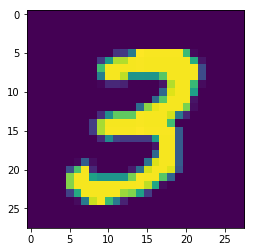

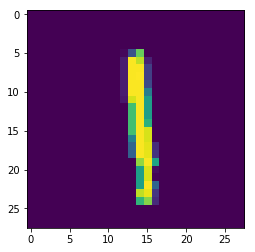

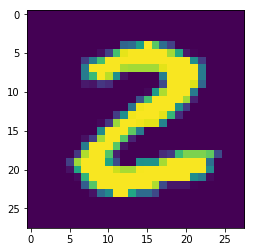

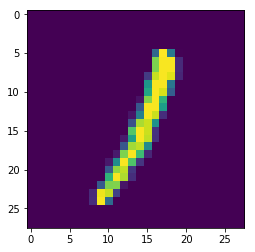

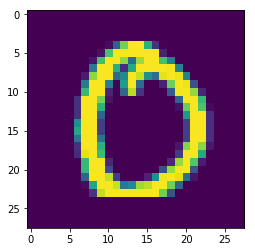

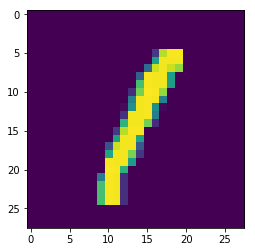

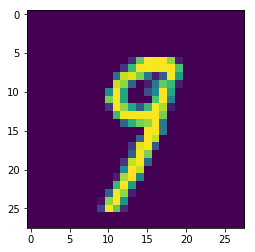

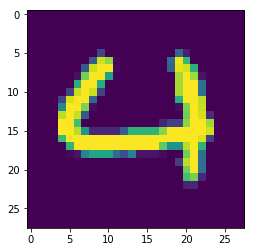

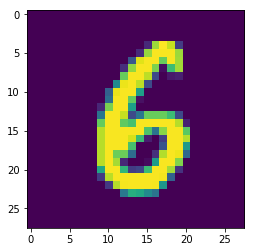

Results


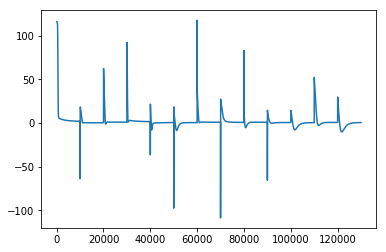

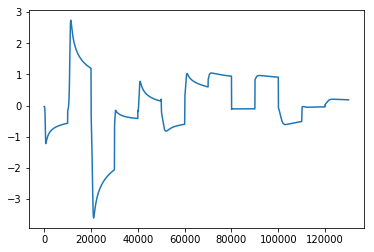

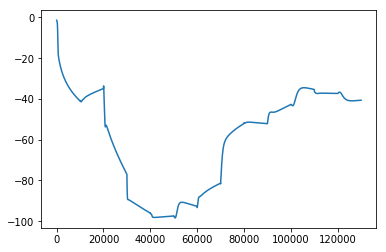

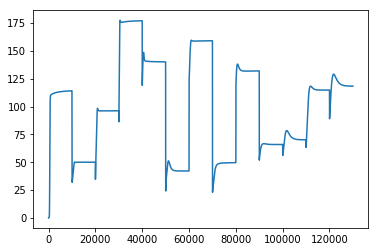

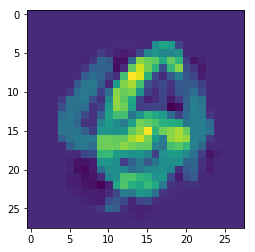

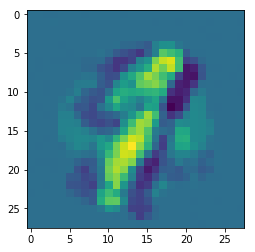

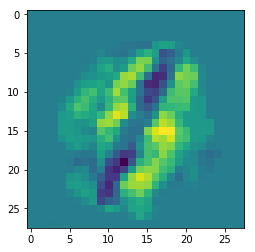

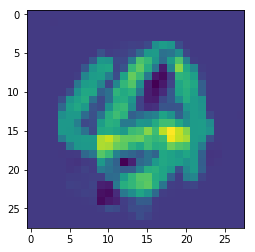

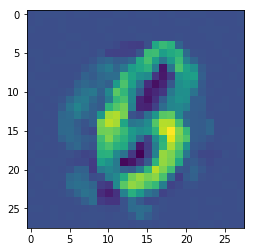

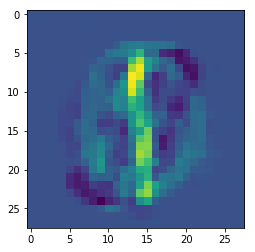

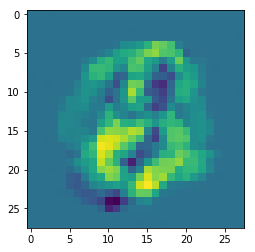

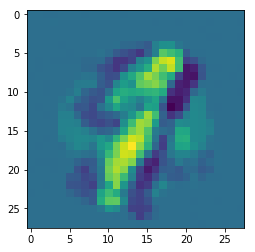

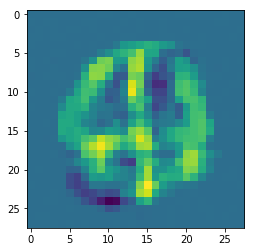

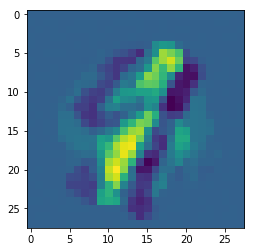

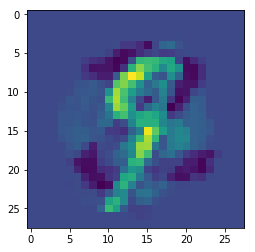

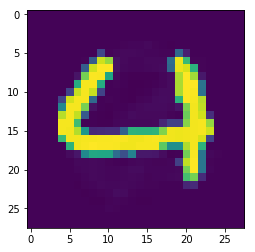

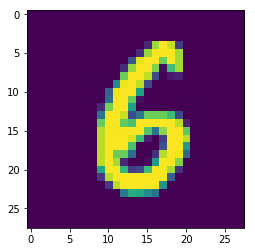

(784, 5)
(784,)


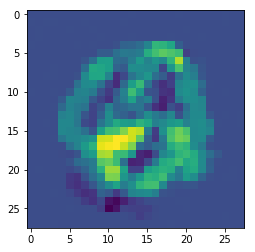

(784,)


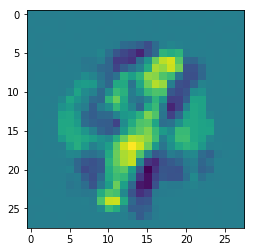

(784,)


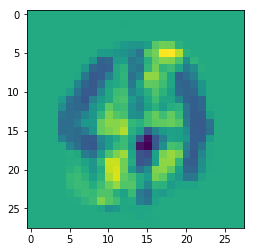

(784,)


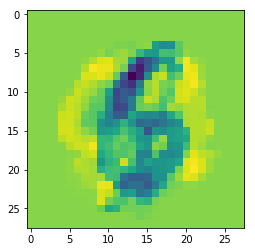

(784,)


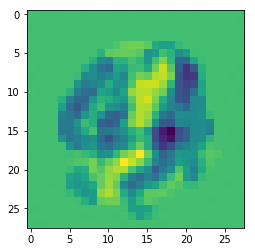

IndexError: index 5 is out of bounds for axis 1 with size 5

In [153]:
learning_rate = 0.001
weight_update_ratio =1

def upward_projection(pe, w):
    return np.dot(w.T, pe)

def update_weight(pe, u):
    return learning_rate * np.dot(pe, u.T)
    
def update_cause_unit(bu , pe):
    return learning_rate * np.subtract(bu, pe)

def top_down_prediction(w, td):
    return np.dot(w, td)

def prediction_error(u, pred):
    return np.subtract(u, pred)

def run_layer(percept_nums, epochs, test_epochs):        
    percs = []
    for num in percept_nums:
        percs.append(np.copy(np.reshape(d[num], (784,1))))

    latents = []
    props = []
    lats = []
    w1 = np.random.normal(0, 0.01, [784, 5])
    u2 = np.random.normal(0, 0.01, [5,1])
    
    for perc in percs:
        plt.imshow(np.reshape(perc, (28,28)))
        plt.show()
        
    print("Results")

    pes = []
    pe2s = []
    weights = []
    preds = []
    
    for perc in percs:
        for i in range(epochs):
            u1 = perc
            pred = top_down_prediction(w1, u2)
            pe1 = prediction_error(u1, pred)
            up1 = upward_projection(pe1, w1)
            pe2 = prediction_error(u2, 0)
            #w1 += update_weight(pe1, u2)
            u2 += update_cause_unit(up1, pe2)
            if i % weight_update_ratio == 0:
                w1 += update_weight(pe1, u2)

            pes.append(np.sum(pe1))
            pe2s.append(np.sum(pe2))
            weights.append(np.sum(w1))
            preds.append(np.sum(pred))
            
    for perc in percs:
        for i in range(test_epochs):
            u1 = perc
            pred = top_down_prediction(w1, u2)
            pe1 = prediction_error(u1, pred)
            up1 = upward_projection(pe1, w1)
            pe2 = prediction_error(u2, 0)
            u2 += update_cause_unit(up1, pe2)
        latents.append(np.copy(u2))
        
    for latent in latents:
        for i in range(test_epochs):
            u2 = latent
            pred = top_down_prediction(w1, u2)
            pe = prediction_error(u1, pred)
            u1 += learning_rate * -1 * pe 
        props.append(np.copy(pred))
        lats.append(np.copy(u1))

    pes = np.array(pes)
    pe2s = np.array(pe2s)
    weights = np.array(weights)
    preds = np.array(preds)
    plt.plot(pes)
    plt.show()
    plt.plot(pe2s)
    plt.show()
    plt.plot(weights)
    plt.show()
    plt.plot(preds)
    plt.show()
    
    for prop in props:
        plt.imshow(np.reshape(prop, (28,28)))
        plt.show()

    print(w1.shape)
    for i in range(20):
        w = w1[:,i]
        print(w.shape)
        w = np.reshape(w, (28,28))
        plt.imshow(w)
        plt.show()
        
run_layer([5,99,172,51,7,8,25,99,88,77,43,60,62], 10000, 500)


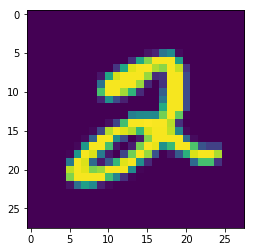

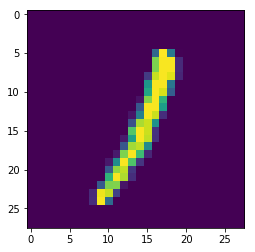

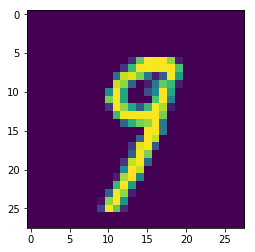

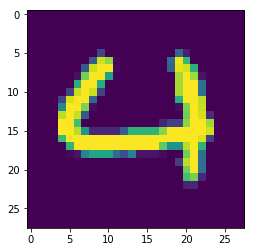

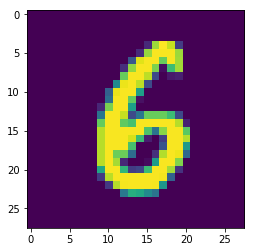

Results


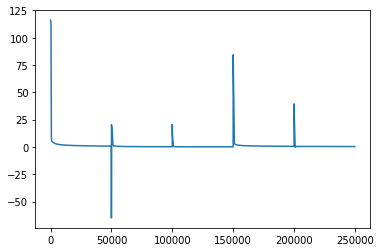

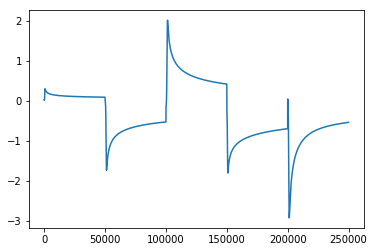

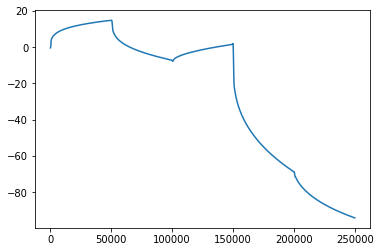

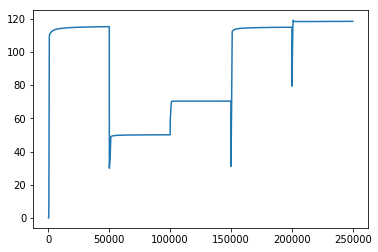

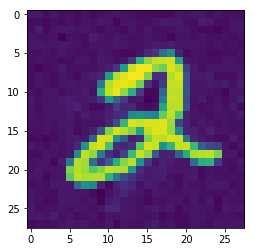

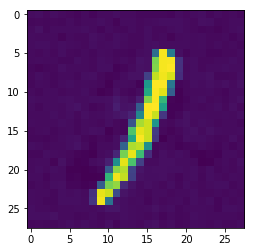

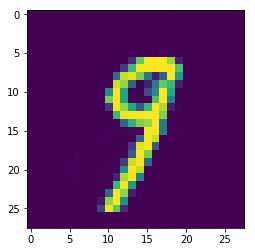

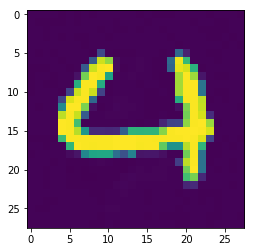

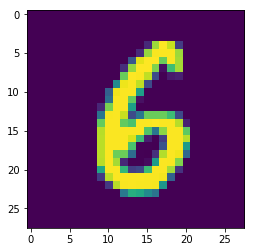

Latent space interpolations!


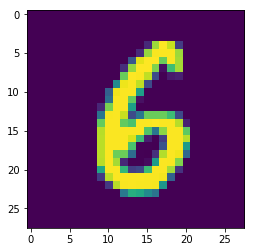

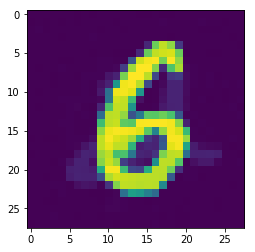

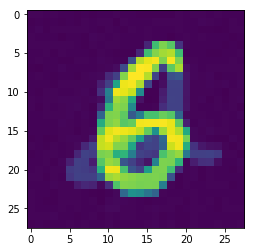

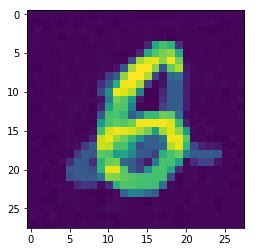

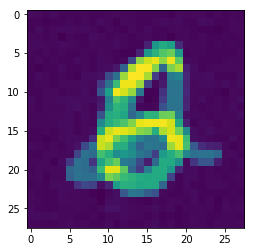

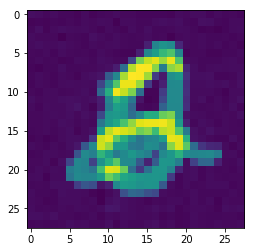

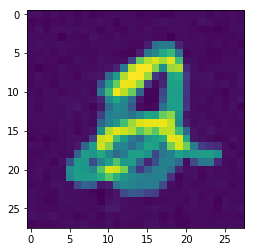

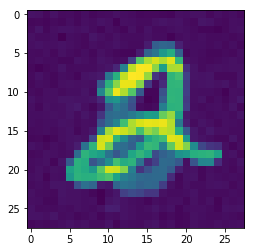

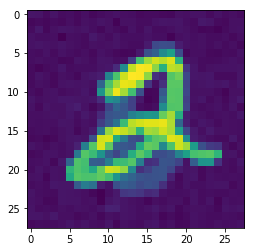

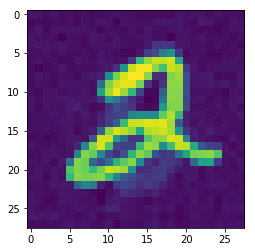

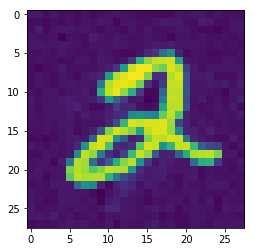

Latent space additions


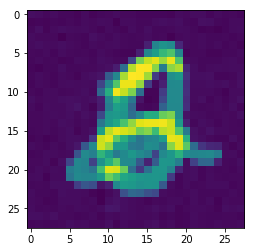

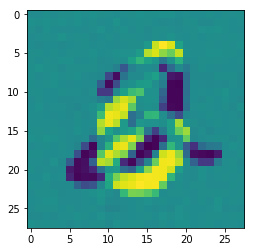

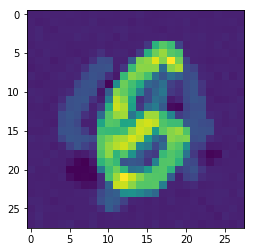

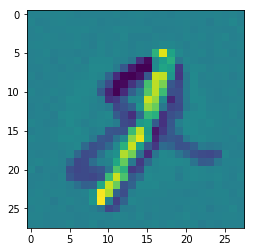

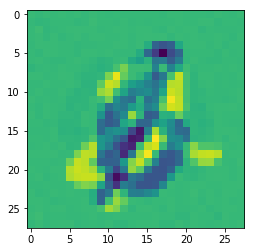

<class 'list'>


In [183]:
learning_rate = 0.001
weight_update_ratio =1

def upward_projection(pe, w):
    return np.dot(w.T, pe)

def update_weight(pe, u):
    return learning_rate * np.dot(pe, u.T)
    
def update_cause_unit(bu , pe):
    return learning_rate * np.subtract(bu, pe)

def top_down_prediction(w, td):
    return np.dot(w, td)

def prediction_error(u, pred):
    return np.subtract(u, pred)

def run_layer(percept_nums, epochs, test_epochs):        
    percs = []
    for num in percept_nums:
        percs.append(np.copy(np.reshape(d[num], (784,1))))

    latents = []
    props = []
    lats = []
    w1 = np.random.normal(0, 0.01, [784, 10])
    u2 = np.random.normal(0, 0.01, [10,1])
    
    for perc in percs:
        plt.imshow(np.reshape(perc, (28,28)))
        plt.show()
        
    print("Results")

    pes = []
    pe2s = []
    weights = []
    preds = []
    
    for perc in percs:
        for i in range(epochs):
            u1 = perc
            pred = top_down_prediction(w1, u2)
            pe1 = prediction_error(u1, pred)
            up1 = upward_projection(pe1, w1)
            pe2 = prediction_error(u2, 0)
            #w1 += update_weight(pe1, u2)
            u2 += update_cause_unit(up1, pe2)
            if i % weight_update_ratio == 0:
                w1 += update_weight(pe1, u2)

            pes.append(np.sum(pe1))
            pe2s.append(np.sum(pe2))
            weights.append(np.sum(w1))
            preds.append(np.sum(pred))
            
    for perc in percs:
        for i in range(test_epochs):
            u1 = perc
            pred = top_down_prediction(w1, u2)
            pe1 = prediction_error(u1, pred)
            up1 = upward_projection(pe1, w1)
            pe2 = prediction_error(u2, 0)
            u2 += update_cause_unit(up1, pe2)
        latents.append(np.copy(u2))
        
    for latent in latents:
        for i in range(test_epochs):
            u2 = latent
            pred = top_down_prediction(w1, u2)
            pe = prediction_error(u1, pred)
            u1 += learning_rate * -1 * pe 
        props.append(np.copy(pred))
        lats.append(np.copy(u1))

    pes = np.array(pes)
    pe2s = np.array(pe2s)
    weights = np.array(weights)
    preds = np.array(preds)
    plt.plot(pes)
    plt.show()
    plt.plot(pe2s)
    plt.show()
    plt.plot(weights)
    plt.show()
    plt.plot(preds)
    plt.show()
    
    for prop in props:
        plt.imshow(np.reshape(prop, (28,28)))
        plt.show()
        
    interps = []
    interp_steps = 10
    A = latents[4]
    B = latents[0]
    diff = (B - A) / interp_steps
    for i in range(interp_steps + 1):
        latent = A + (i * diff)
        for i in range(test_epochs):
            u2 = latent
            pred = top_down_prediction(w1, u2)
            pe = prediction_error(u1, pred)
            u1 += learning_rate * -1 * pe 
        interps.append(np.copy(pred))
        
    print("Latent space interpolations!")
    for interp in interps:
        plt.imshow(np.reshape(interp, (28,28)))
        plt.show()
        
    print("Latent space additions")
    latent = A + B
    for i in range(test_epochs):
        u2 = latent
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe 
    plt.imshow(np.reshape(np.copy(pred), (28,28)))
    plt.show()
        
    latent = A - B
    for i in range(test_epochs):
        u2 = latent
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe 
    plt.imshow(np.reshape(np.copy(pred), (28,28)))
    plt.show()
    
    latent = A * B 
    for i in range(test_epochs):
        u2 = latent
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe 
    plt.imshow(np.reshape(np.copy(pred), (28,28)))
    plt.show()
    
    latent = A / B
    for i in range(test_epochs):
        u2 = latent
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe 
    plt.imshow(np.reshape(np.copy(pred), (28,28)))
    plt.show()
    
    latent = A * A
    for i in range(test_epochs):
        u2 = latent
        pred = top_down_prediction(w1, u2)
        pe = prediction_error(u1, pred)
        u1 += learning_rate * -1 * pe 
    plt.imshow(np.reshape(np.copy(pred), (28,28)))
    plt.show()

    #print(w1.shape)
    #for i in range(20):
    ##    w = w1[:,i]
    #    print(w.shape)
    #    w = np.reshape(w, (28,28))
     #   plt.imshow(w)
     #   plt.show()
        
    return percs, latents, props, lats
        
percs, latents, props, lats = run_layer([5,99,43,60,62], 50000, 500)


print(type(latents))

In [178]:
print(len(latents))
print(len(latents[0]))
#for vals in zip(*latents):
#    print([e[0] for e in vals])
A = latents[4]
B = latents[0]
diff = ((B - A)/10)
R = A +  10 * diff
for vals in zip(*[R,B]):
    print([e[0] for e in vals])
    

5
10
[0.6006971764485824, 0.6006971764485823]
[-0.5914547363499328, -0.5914547363499328]
[0.3947050094240979, 0.39470500942409786]
[0.12008026557464441, 0.12008026557464441]
[0.2665112994115223, 0.2665112994115223]
[-0.17055496220813282, -0.17055496220813288]
[0.8815064500518349, 0.8815064500518349]
[0.5119988986882886, 0.5119988986882886]
[0.42878625593047087, 0.42878625593047087]
[0.49944006758683057, 0.4994400675868306]


Results
Epoch 0 starting
Epoch 1 starting
Epoch 2 starting
Epoch 3 starting
Epoch 4 starting
Epoch 5 starting
Epoch 6 starting
Epoch 7 starting
Epoch 8 starting
Epoch 9 starting
Epoch 10 starting
Epoch 11 starting
Epoch 12 starting
Epoch 13 starting
Epoch 14 starting
Epoch 15 starting
Epoch 16 starting
Epoch 17 starting
Epoch 18 starting
Epoch 19 starting
Epoch 20 starting
Epoch 21 starting
Epoch 22 starting
Epoch 23 starting
Epoch 24 starting
Epoch 25 starting
Epoch 26 starting
Epoch 27 starting
Epoch 28 starting
Epoch 29 starting
Epoch 30 starting
Epoch 31 starting
Epoch 32 starting
Epoch 33 starting
Epoch 34 starting
Epoch 35 starting
Epoch 36 starting
Epoch 37 starting
Epoch 38 starting
Epoch 39 starting
Epoch 40 starting
Epoch 41 starting
Epoch 42 starting
Epoch 43 starting
Epoch 44 starting
Epoch 45 starting
Epoch 46 starting
Epoch 47 starting
Epoch 48 starting
Epoch 49 starting


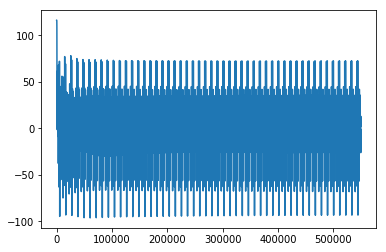

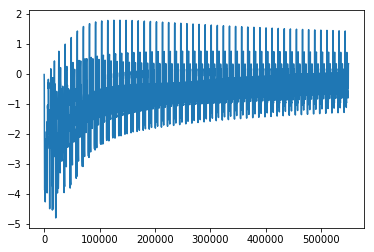

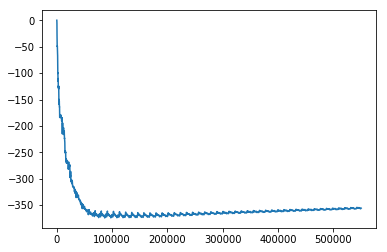

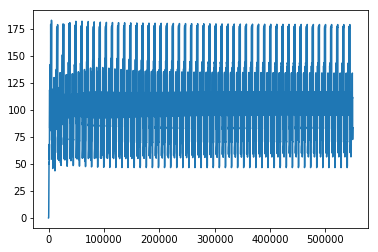

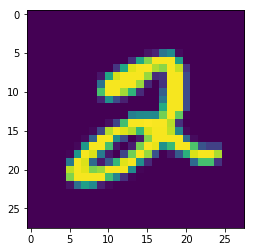

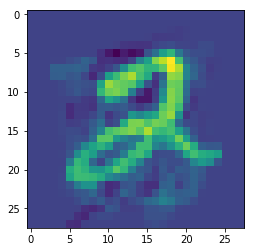

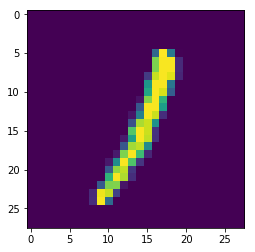

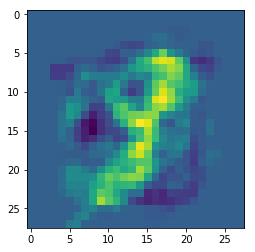

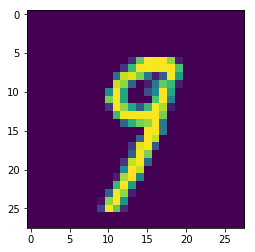

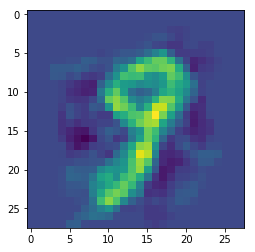

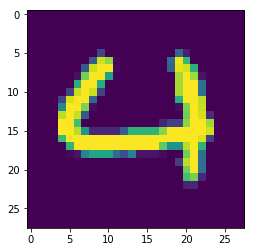

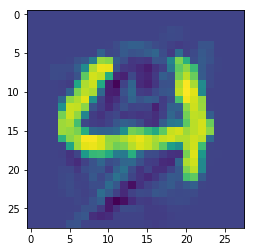

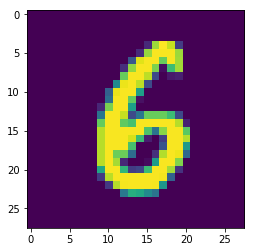

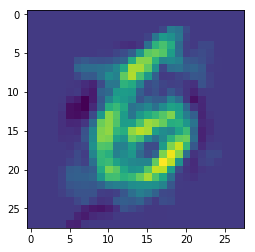

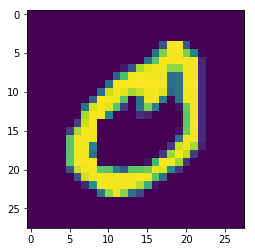

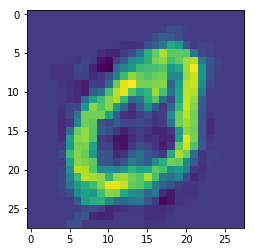

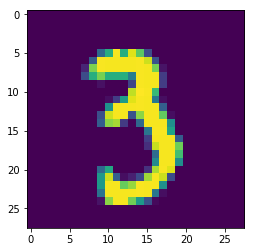

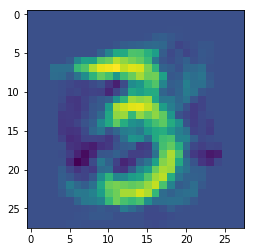

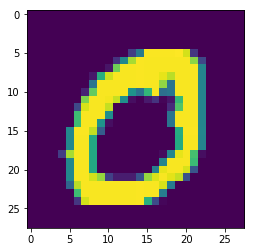

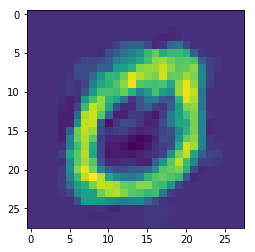

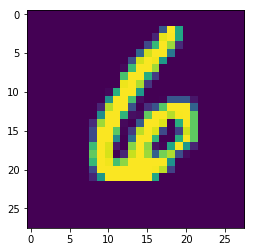

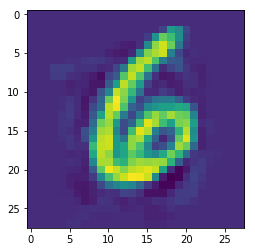

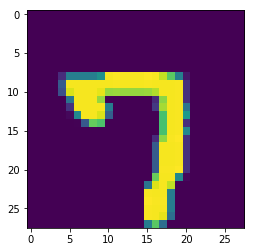

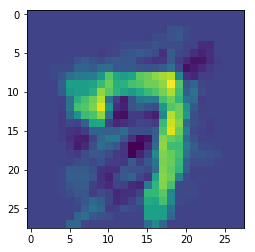

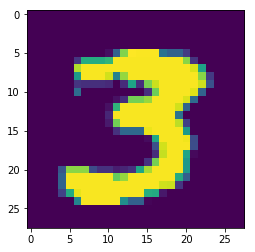

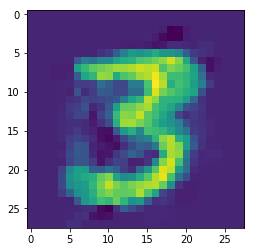

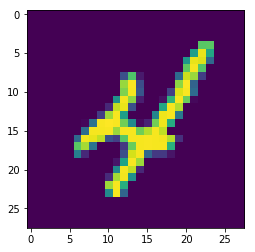

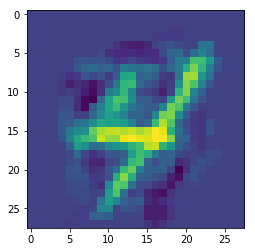

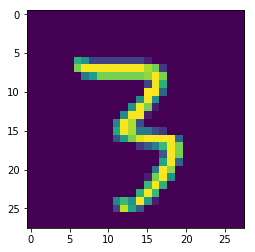

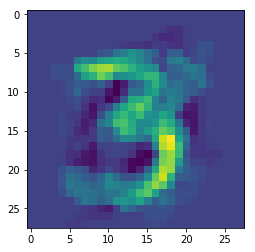

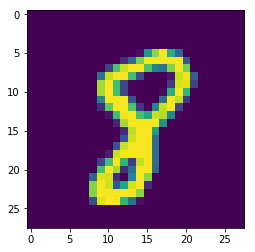

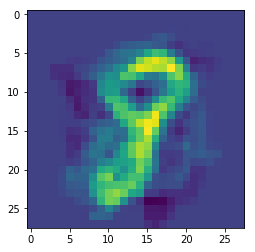

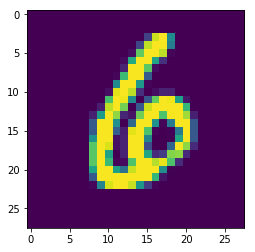

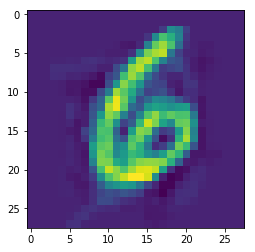

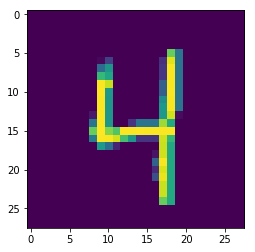

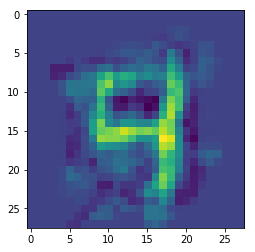

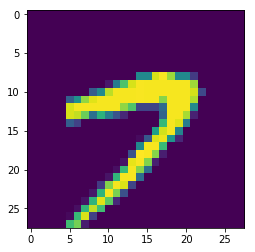

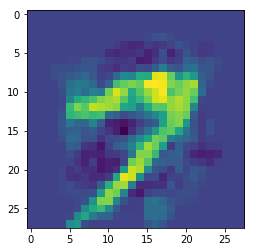

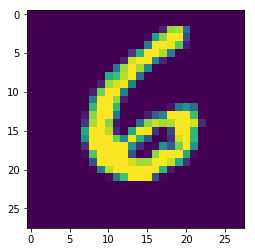

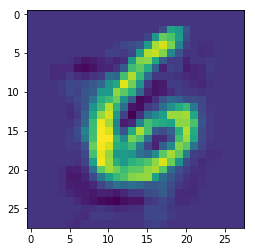

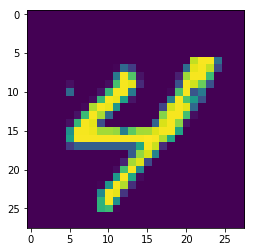

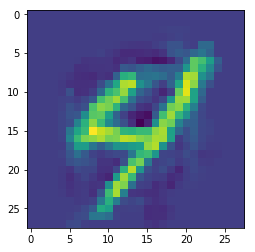

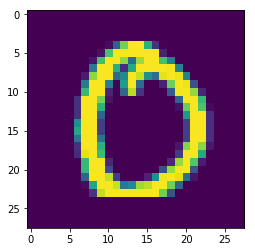

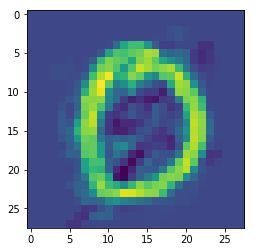

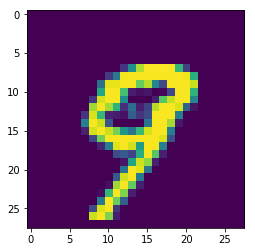

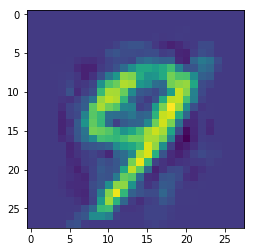

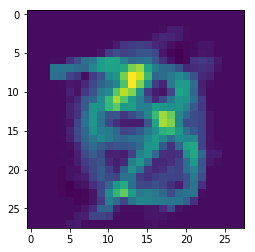

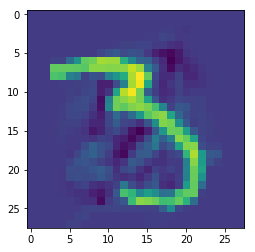

In [191]:
learning_rate = 0.001
weight_update_ratio =1

def upward_projection(pe, w):
    return np.dot(w.T, pe)

def update_weight(pe, u):
    return learning_rate * np.dot(pe, u.T)
    
def update_cause_unit(bu , pe):
    return learning_rate * np.subtract(bu, pe)

def top_down_prediction(w, td):
    return np.dot(w, td)

def prediction_error(u, pred):
    return np.subtract(u, pred)

def run_layer(percept_nums, epochs, test_epochs, runs):        
    percs = []
    for num in percept_nums:
        percs.append(np.copy(np.reshape(d[num], (784,1))))

    latents = []
    props = []
    lats = []
    w1 = np.random.normal(0, 0.01, [784, 10])
    u2 = np.random.normal(0, 0.01, [10,1])
    
    #for perc in percs:
    #    plt.imshow(np.reshape(perc, (28,28)))
    #    plt.show()
        
    print("Results")

    pes = []
    pe2s = []
    weights = []
    preds = []
    
    for epoch in range(epochs):
        print("Epoch " + str(epoch) + " starting")
        for perc in percs:
            for i in range(runs):
                u1 = perc
                pred = top_down_prediction(w1, u2)
                pe1 = prediction_error(u1, pred)
                up1 = upward_projection(pe1, w1)
                pe2 = prediction_error(u2, 0)
                #w1 += update_weight(pe1, u2)
                u2 += update_cause_unit(up1, pe2)
                if i % weight_update_ratio == 0:
                    w1 += update_weight(pe1, u2)

                pes.append(np.sum(pe1))
                pe2s.append(np.sum(pe2))
                weights.append(np.sum(w1))
                preds.append(np.sum(pred))
            
    for perc in percs:
        for i in range(test_epochs):
            u1 = perc
            pred = top_down_prediction(w1, u2)
            pe1 = prediction_error(u1, pred)
            up1 = upward_projection(pe1, w1)
            pe2 = prediction_error(u2, 0)
            u2 += update_cause_unit(up1, pe2)
        latents.append(np.copy(u2))
        
    for latent in latents:
        for i in range(test_epochs):
            u2 = latent
            pred = top_down_prediction(w1, u2)
            pe = prediction_error(u1, pred)
            u1 += learning_rate * -1 * pe 
        props.append(np.copy(pred))
        lats.append(np.copy(u1))

    pes = np.array(pes)
    pe2s = np.array(pe2s)
    weights = np.array(weights)
    preds = np.array(preds)
    plt.plot(pes)
    plt.show()
    plt.plot(pe2s)
    plt.show()
    plt.plot(weights)
    plt.show()
    plt.plot(preds)
    plt.show()
    
    for perc, prop in zip(percs,props):
        plt.imshow(np.reshape(perc, (28,28)))
        plt.show()
        plt.imshow(np.reshape(prop, (28,28)))
        plt.show()


    return percs, latents, props, lats
        
percs, latents, props, lats = run_layer([5,99,43,60,62,21,74,51,155,196,27,9,44, 94,93,92,91,90,89,88,87,86], 50, 500,500)


In [310]:

"""
    for perc in percs:
        for i in range(test_epochs):
            u1 = perc
            pred = top_down_prediction(w1, u2)
            pe1 = prediction_error(u1, pred)
            up1 = upward_projection(pe1, w1)
            pe2 = prediction_error(u2, 0)
            u2 += update_cause_unit(up1, pe2)
        latents.append(np.copy(u2))
        
    for latent in latents:
        for i in range(test_epochs):
            u2 = latent
            pred = top_down_prediction(w1, u2)
            pe = prediction_error(u1, pred)
            u1 += learning_rate * -1 * pe 
        props.append(np.copy(pred))
        lats.append(np.copy(u1))
"""

class Model():
    
    def __init__(self, data, epochs, convergence_runs=200):
        self.convergence_runs = 200
        self.data = data
        self.epochs = epochs
        self.layers = []
        self.upwards = []
        self.downwards = []
        self.wlist = []
        self.predlist = []
        self.pelist = []
        self.full_predlist = []
        
    def add(self, layer):
        self.layers.append(layer)
        
    def initialize(self):
        for i, layer in enumerate(self.layers):
            self.upwards.append(np.random.normal(0,0.1, [layer.top_down_size,1]))
            self.downwards.append(np.random.normal(0,0.1, [layer.bottom_up_size,1]))
            self.wlist.append([])
            self.predlist.append([])
            self.pelist.append([])
        self.upwards.append(0)
        self.downwards.append(None)
        
    def train(self):
        for epoch in range(self.epochs):
            print("Starting epoch: " + str(epoch))
            self.downwards[-1] = None 
            for dat in self.data:
                self.upwards[0] = np.reshape(dat,(784,1))
                for i in range(self.convergence_runs):
                    for j,layer in enumerate(self.layers):
                        #print("Layer " + str(j))
                        up, down, weights, preds, pes = layer.run(self.upwards[j], self.downwards[j+1])
                        #print(up)
                        #print(down)
                        self.upwards[j+1] = up
                        self.downwards[j] = down 
                        self.wlist[j].append(np.sum(weights))
                        self.predlist[j].append(np.sum(preds))
                        self.pelist[j].append(np.sum(pes))
                        
            self.full_predlist.append(np.copy(self.layers[0].preds))
            
            
    def get_latents(self, inputs):
        latents = []
        for inp in inputs:
            for i in range(self.convergence_runs):
                self.upwards[0] = np.reshape(inp, (784,1))
                for j,layer in enumerate(self.layers):
                    #print("Layer : " + str(j))
                    up, down, weights, preds, pes = layer.run(self.upwards[j], self.downwards[j+1], training=False) # as only inference!
                    self.upwards[j+1] = up
                    self.downwards[j] = down 
            latents.append(np.copy(self.layers[-1].latents))
        return latents
    
    def get_predictions_from_latents(self, latents):
        predictions = []
        """
        for l in latents:
            print(np.mean(l))
            for i in range(self.convergence_runs):
                self.layers[-1].latents = l
                for j, layer in enumerate(self.layers):
                    up, down, weights, preds, pes = layer.run(self.upwards[j], self.downwards[j+1], training=False) # as only inference!
                    self.upwards[j+1] = up
                    self.downwards[j] = down 
                print(np.mean(self.layers[0].preds))
            plt.imshow(np.reshape(self.layers[0].preds, (28,28)))
            plt.show()
            predictions.append(np.copy(self.layers[0].preds))
        """
        for l in latents:
            l1 = self.layers[0]
            pred = l1.top_down_prediction(l1.weights, l)
            predictions.append(pred)
            
        return predictions
    
    def interpolation_latents(self,l1, l2, num_steps):
    interps = []
    diff = (l2 - l1) / num_steps
    for i in range(num_steps):
        latent = l1 + (i * diff)
        for i in range(self.convergence_runs):
            self.upwards[0] = np.reshape(latent, (784,1))
            for j,layer in enumerate(self.layers):
                #print("Layer : " + str(j))
                up, down, weights, preds, pes = layer.run(self.upwards[j], self.downwards[j+1], training=False) # as only inference!
                self.upwards[j+1] = up
                self.downwards[j] = down 
        interps.append(np.copy(self.layers[-1].latents))
    return interps

    def interpolate(self, l1, l2,num_steps):
        interps = self.interpolation_latents(l1, l2, num_steps)
        preds = self.get_predictions_from_latents(interps)
        return preds
            
 
    def plot(self):
        self.wlist = np.array(self.wlist[0])
        self.predlist = np.array(self.predlist[0])
        self.pelist = np.array(self.pelist[0])
        plt.plot(self.wlist)
        plt.show()
        plt.plot(self.predlist)
        plt.show()
        plt.plot(self.pelist)
        plt.show()
        for pred in self.full_predlist:
            plt.imshow(np.reshape(pred, (28,28)))
            plt.show()
        
                        
                        
            
    
    

class Layer():
    
    def __init__(self,learning_rate, bottom_up_size, top_down_size, input_layer=False, weight_update_ratio = 1):
        self.learning_rate = learning_rate
        self.bottom_up_size = bottom_up_size
        self.top_down_size = top_down_size
        self.weights = np.random.normal(0, 0.1, [bottom_up_size, top_down_size])
        self.latents = np.random.normal(0, 0.1, [bottom_up_size,1])
        self.input_layer = input_layer
        self.weight_update_ratio = weight_update_ratio
               
        
    def upward_projection(self,pe, w):
        return np.dot(w.T, pe)

    def update_weight(self,pe, u):
        return learning_rate * np.dot(pe, u.T)

    def update_cause_unit(self,bu , pe):
        return learning_rate * np.subtract(bu, pe)

    def top_down_prediction(self,w, td):
        return np.dot(w, td)

    def prediction_error(self,u, pred):
        return np.subtract(u, pred)
    
    
    def run(self, bottom_up, top_down, training=True):
        if self.input_layer:
            self.latents = bottom_up
        if top_down is None:
            pe1 = prediction_error(self.latents, 0)
            #print(pe1.shape)
            #print(bottom_up.shape)
            self.latents += self.update_cause_unit(bottom_up, pe1)
            self.preds = pe1
            return None, self.latents, self.weights, pe1, pe1
        else:
            self.preds = self.top_down_prediction(self.weights, top_down)
            pe1 = self.prediction_error(self.latents, self.preds)            
            up = self.upward_projection(pe1, self.weights)
            #print(np.sum(pred))
            #print(np.sum(pe1))
            #print(np.sum(up))
            if not self.input_layer:
                self.latents += self.update_cause_unit(bottom_up, pe1)
            if i % weight_update_ratio == 0 and training is True:
                self.weights += self.update_weight(pe1, top_down)
            
            return up, self.latents, self.weights, self.preds, pe1 
    
class SigmoidLayer():
    
    def __init__(self,learning_rate, bottom_up_size, top_down_size, input_layer=False, weight_update_ratio = 1):
        self.learning_rate = learning_rate
        self.bottom_up_size = bottom_up_size
        self.top_down_size = top_down_size
        self.weights = np.random.normal(0, 0.1, [bottom_up_size, top_down_size])
        self.latents = np.random.normal(0, 0.1, [bottom_up_size,1])
        self.input_layer = input_layer
        self.weight_update_ratio = weight_update_ratio
               
        
    def sigmoidderiv(x):
        return sigmoid(x) * (1 - sigmoid(x))

    def upward_projection(pe, w):
        return sigmoidderiv(np.dot(w.T, pe)) 

    def update_weight(predderiv, pe, u):
        return learning_rate * np.dot(pe * predderiv,  u.T)

    def update_cause_unit(bu , pe):
        return learning_rate * np.subtract(bu, pe)

    def top_down_prediction(w, td):
        return sigmoid(np.dot(w, td))

    def prediction_error(u, pred):
        return np.subtract(u, pred)

    def prediction_derivative(w,u):
        return sigmoidderiv(np.dot(w, u))
    
    pred = top_down_prediction(w1, u2)
        predderiv = prediction_deriv(w1, u2)
        pe1 = prediction_error(u1, pred)
        up1 = upward_projection(predderiv,pe1, w1)
        pe2 = prediction_error(u2, 0)
        w1 += update_weight(predderiv, pe1, u2)
        u2 += update_cause_unit(up1, pe2)
    
    
    def run(self, bottom_up, top_down, training=True):
        self.bottom_up = bottom_up
        self.top_down = top_down
        if self.input_layer:
            self.latents = self.bottom_up
        if self.top_down is None:
            self.prediction_errors = prediction_error(self.latents, 0)
            self.latents += self.update_cause_unit(self.bottom_up, self.prediction_errors)
            self.preds = self.prediction_errors
            return None, self.latents, self.weights, self.prediction_errors, self.prediction_errors
        else:
            self.preds = self.top_down_prediction(self.weights, self.top_down)
            self.prediction_errors = self.prediction_error(self.latents, self.preds)  
            self.predderiv = self.prediction_deriv(self.weights, top_down)
            self.up = self.upward_projection(self.predderiv,self.prediction_errors, self.weights)
            #print(np.sum(pred))
            #print(np.sum(pe1))
            #print(np.sum(up))
            if not self.input_layer:
                self.latents += self.update_cause_unit(self.bottom_up, self.prediction_errors)
            if i % weight_update_ratio == 0 and training is True:
                self.weights += self.update_weight(delf.predderiv,self.prediction_errors, self.top_down)
            
            return self.up, self.latents, self.weights, self.preds, self.prediction_errors

print("DOne!")

DOne!


(60000, 784)
121.94117647058823
Starting epoch: 0
Starting epoch: 1
Starting epoch: 2
Starting epoch: 3
Starting epoch: 4
Starting epoch: 5
Starting epoch: 6
Starting epoch: 7
Starting epoch: 8
Starting epoch: 9
Starting epoch: 10
Starting epoch: 11
Starting epoch: 12
Starting epoch: 13
Starting epoch: 14
Starting epoch: 15
Starting epoch: 16
Starting epoch: 17
Starting epoch: 18
Starting epoch: 19


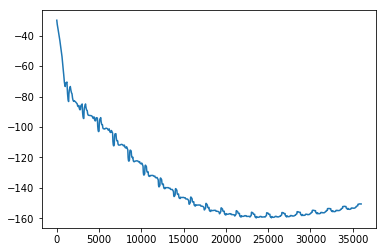

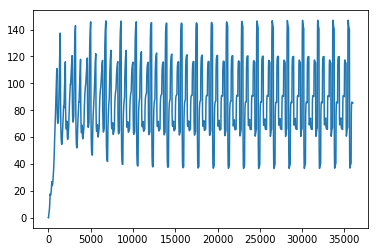

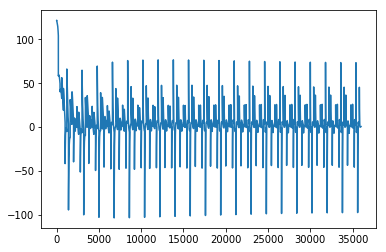

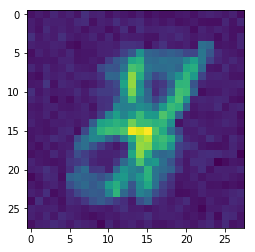

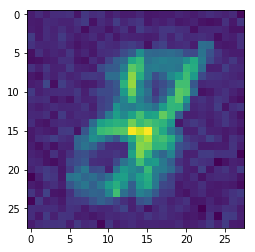

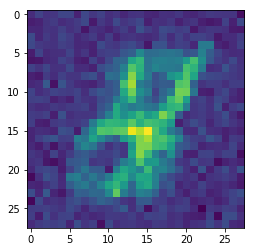

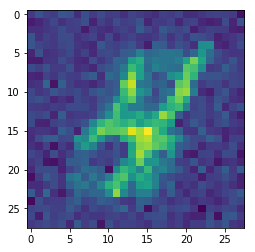

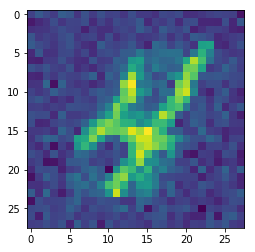

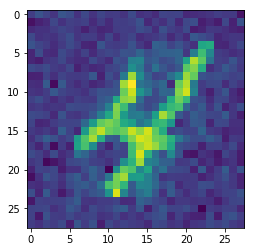

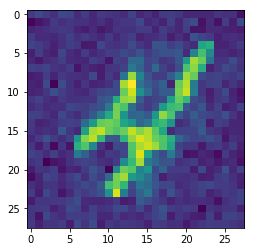

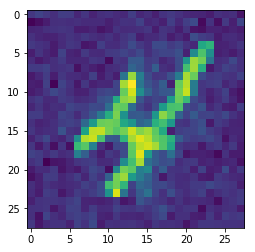

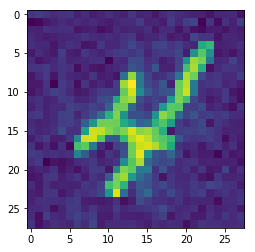

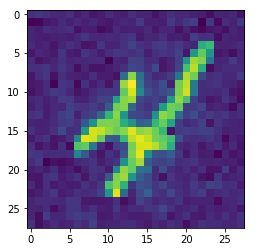

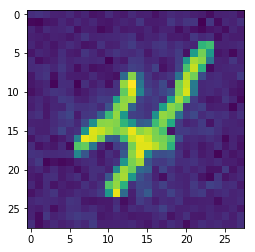

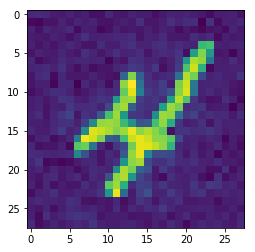

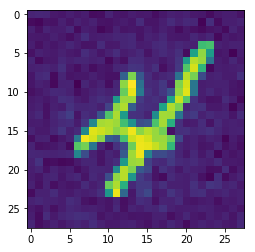

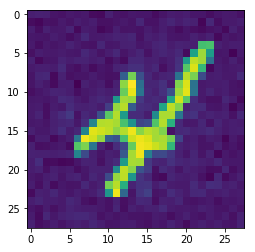

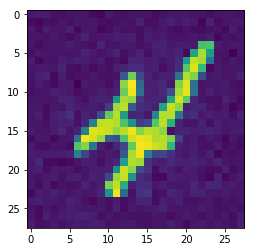

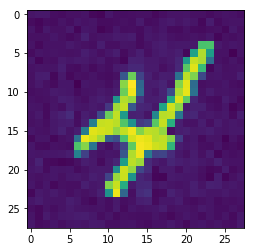

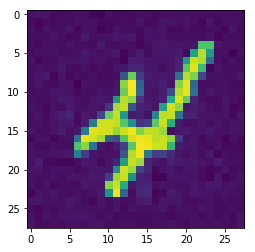

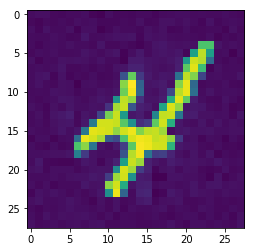

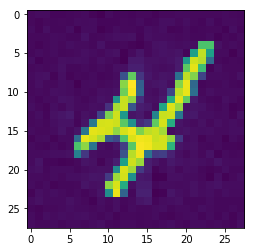

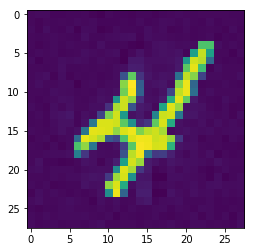

In [321]:
print(d.shape)
print(np.sum(d[1]))
#print(d[1]) 
#for i in range(10):
#    plt.imshow(np.reshape(d[i], (28,28)))
 #   plt.show()
m = Model(d[1:10], 20)
l1 = Layer(0.01, 784, 20, input_layer=True)
l2 = Layer(0.01, 20,1)
m.add(l1)
m.add(l2)
m.initialize()
m.train()
m.plot()

(9, 784)
<class 'list'>
9
(20, 1)
<class 'list'>
9


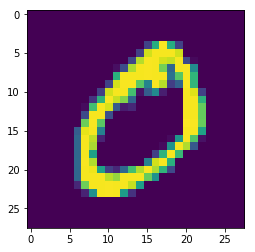

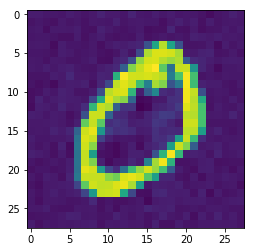

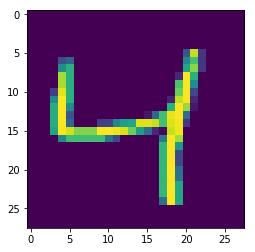

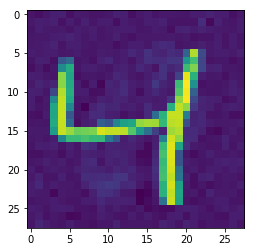

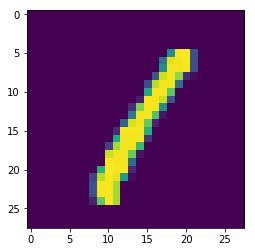

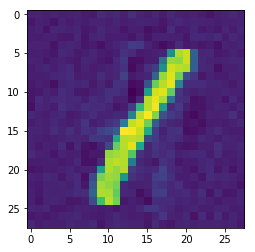

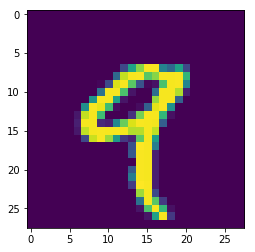

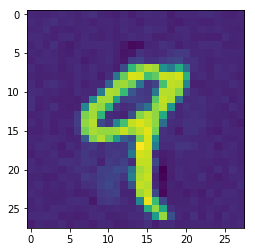

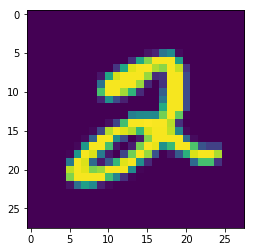

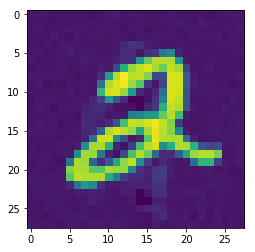

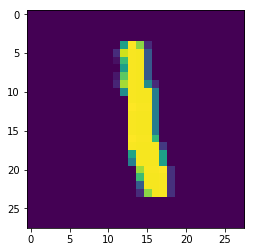

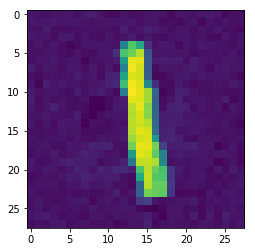

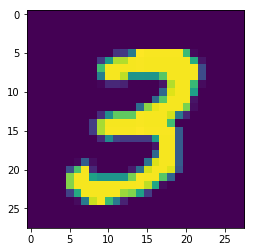

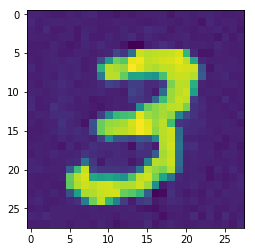

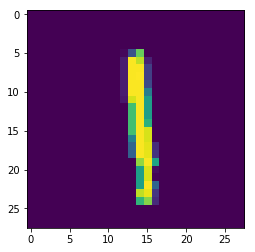

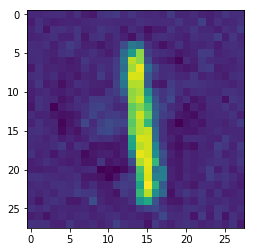

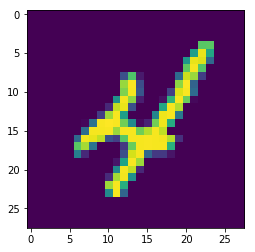

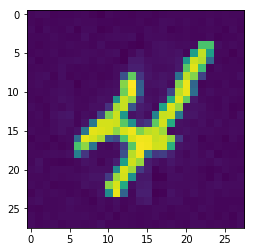

In [322]:
dat = d[1:10]
print(dat.shape)
latents = m.get_latents(dat)
print(type(latents))
print(len(latents))
l = latents[0]
print(l.shape)
#for vals in zip(*latents):
 #   print([e[0] for e in vals])
preds = m.get_predictions_from_latents(latents)
print(type(preds))
print(len(preds))
for q,p in zip(dat,preds):
    plt.imshow(np.reshape(q, (28,28)))
    plt.show()
    plt.imshow(np.reshape(p, (28,28)))
    plt.show()
    

(60000, 784)
(499, 784)
Starting epoch: 0
Starting epoch: 1
Starting epoch: 2
Starting epoch: 3
Starting epoch: 4
Starting epoch: 5
Starting epoch: 6
Starting epoch: 7
Starting epoch: 8
Starting epoch: 9
Starting epoch: 10
Starting epoch: 11
Starting epoch: 12
Starting epoch: 13
Starting epoch: 14
Starting epoch: 15
Starting epoch: 16
Starting epoch: 17
Starting epoch: 18
Starting epoch: 19
Starting epoch: 20
Starting epoch: 21
Starting epoch: 22
Starting epoch: 23
Starting epoch: 24
Starting epoch: 25
Starting epoch: 26
Starting epoch: 27
Starting epoch: 28
Starting epoch: 29
Starting epoch: 30
Starting epoch: 31
Starting epoch: 32
Starting epoch: 33
Starting epoch: 34
Starting epoch: 35
Starting epoch: 36
Starting epoch: 37
Starting epoch: 38
Starting epoch: 39
Starting epoch: 40
Starting epoch: 41
Starting epoch: 42
Starting epoch: 43
Starting epoch: 44
Starting epoch: 45
Starting epoch: 46
Starting epoch: 47
Starting epoch: 48
Starting epoch: 49


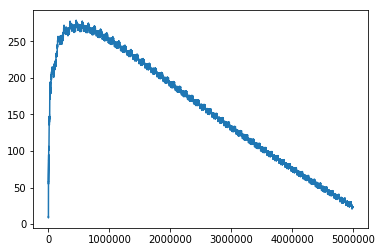

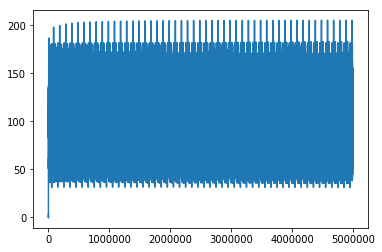

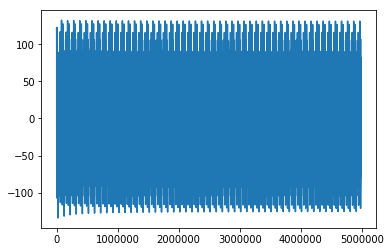

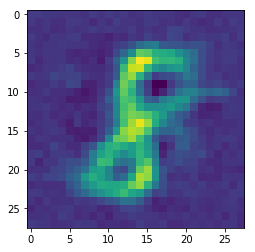

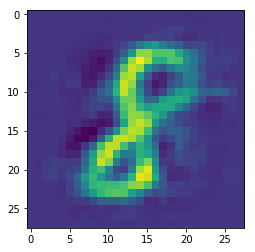

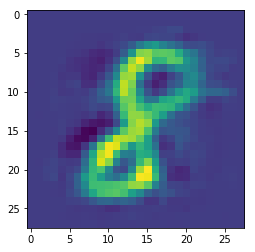

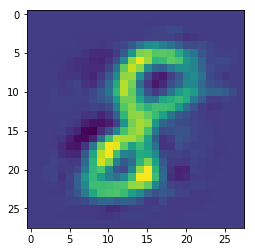

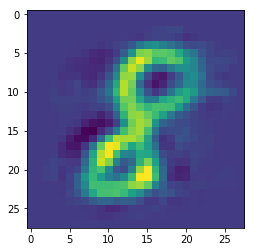

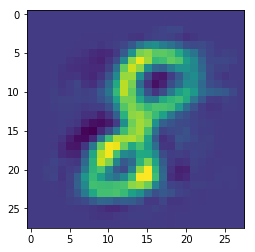

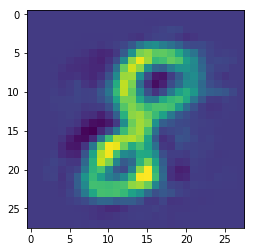

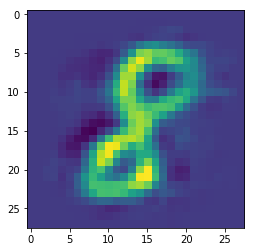

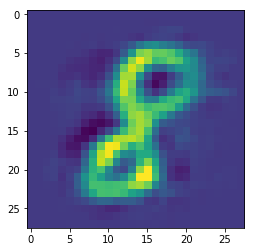

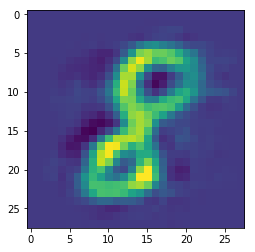

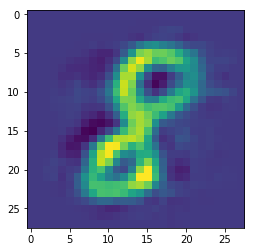

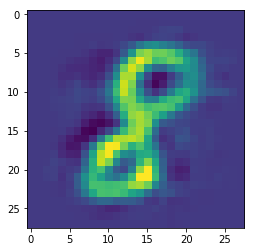

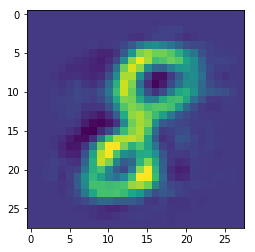

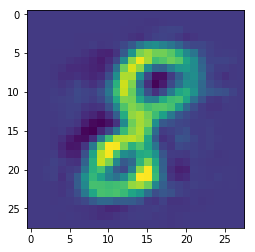

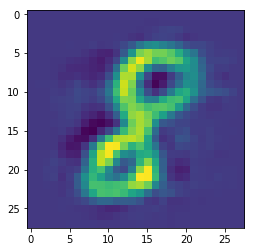

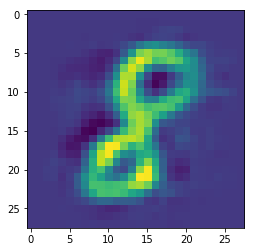

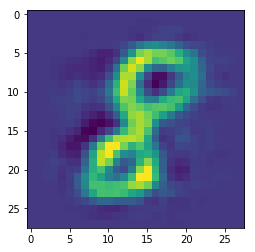

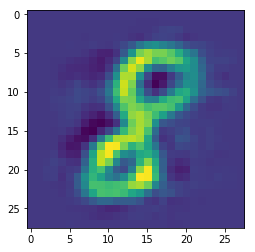

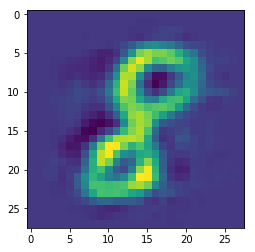

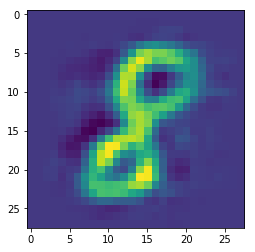

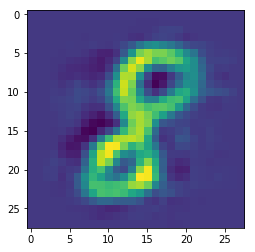

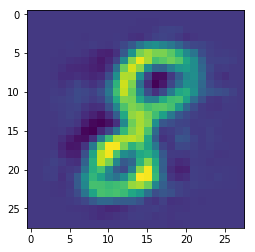

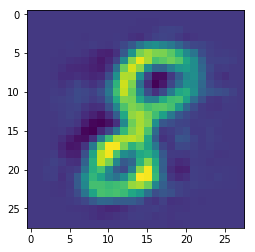

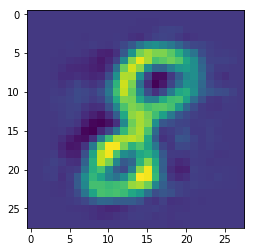

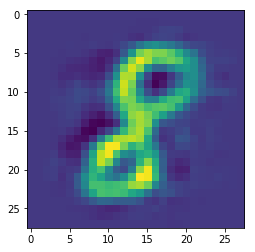

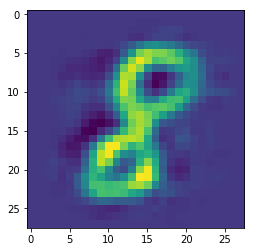

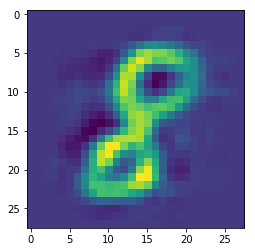

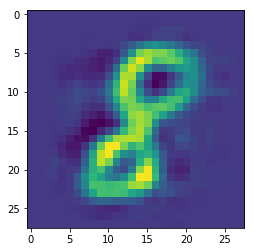

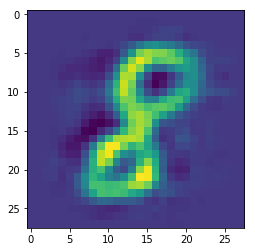

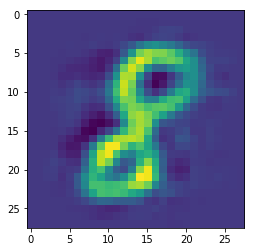

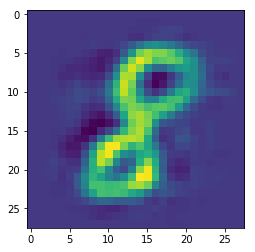

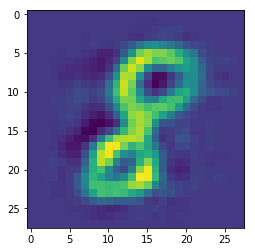

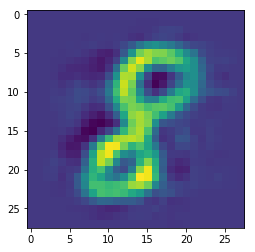

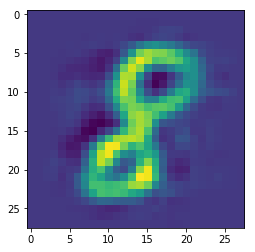

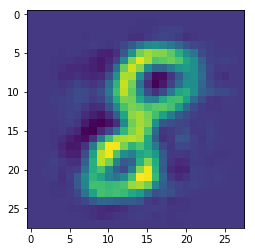

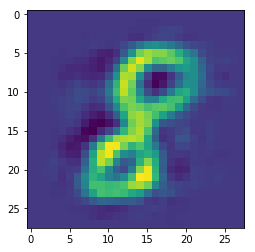

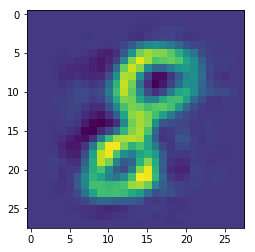

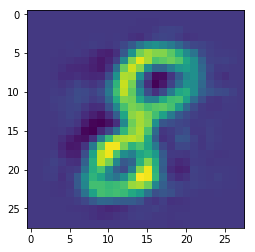

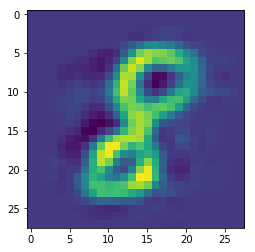

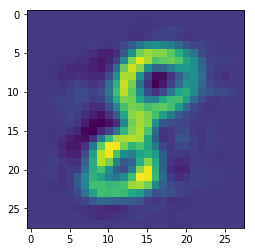

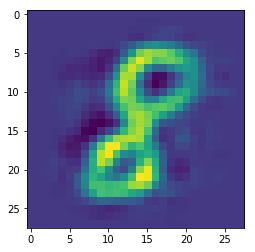

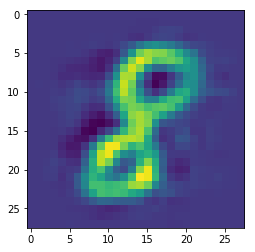

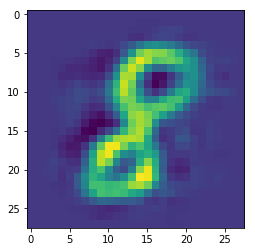

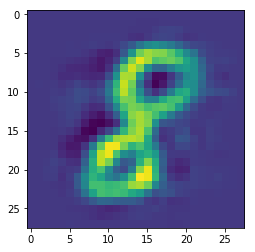

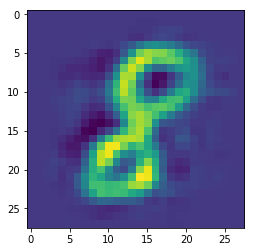

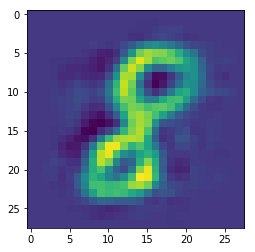

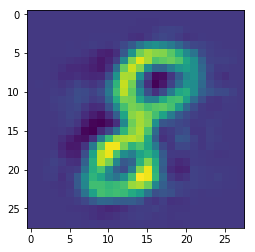

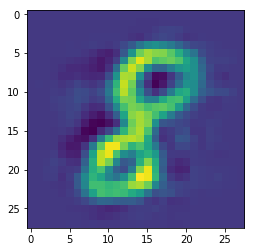

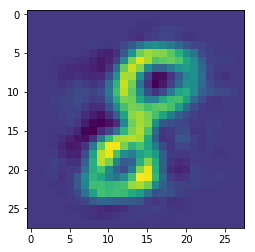

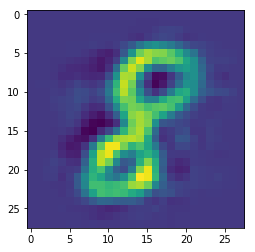

In [324]:

print(d[1:500].shape)
m2 = Model(d[1:500], 50)
l1 = Layer(0.01, 784, 20, input_layer=True)
l2 = Layer(0.01, 20,1)
m2.add(l1)
m2.add(l2)
m2.initialize()
m2.train()
m2.plot()

(20, 784)
<class 'list'>
20
(20, 1)
<class 'list'>
20


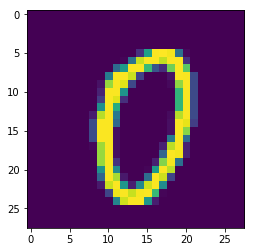

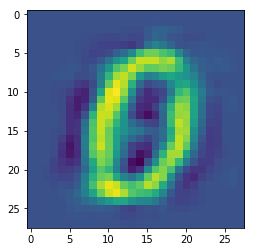

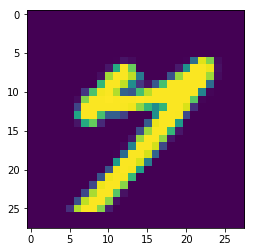

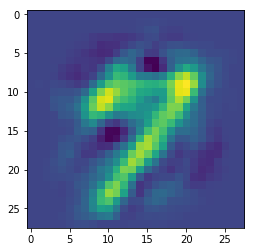

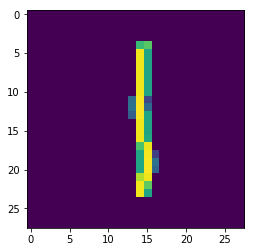

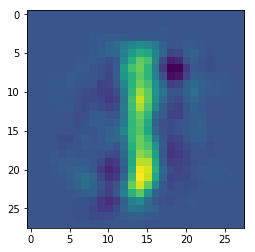

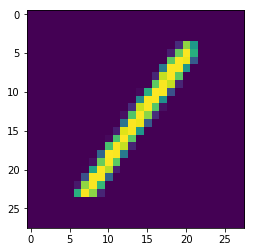

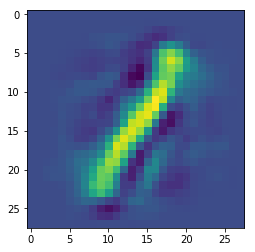

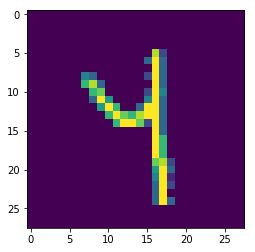

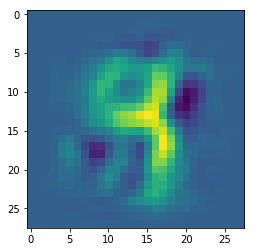

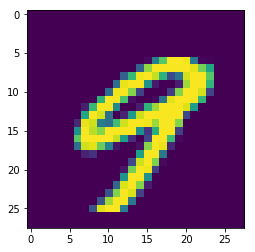

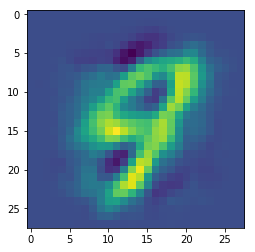

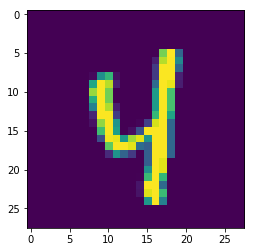

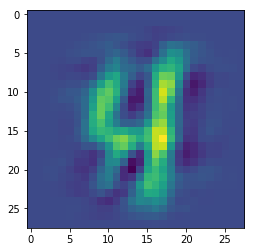

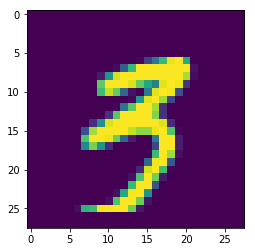

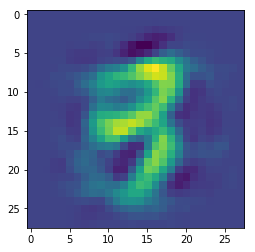

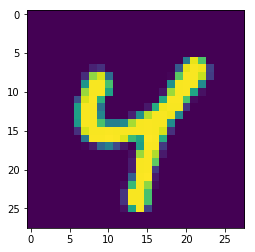

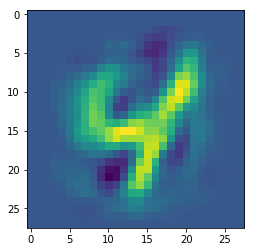

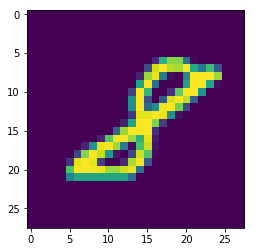

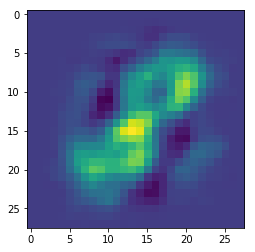

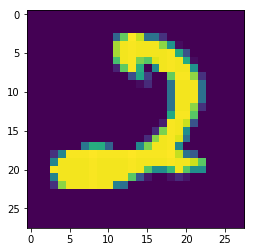

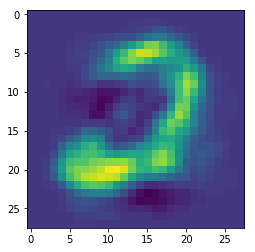

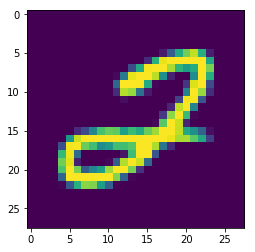

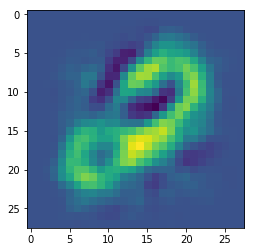

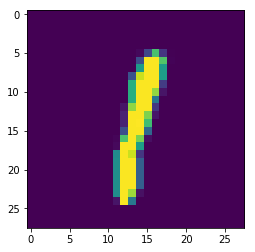

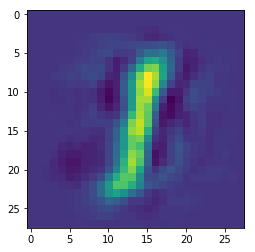

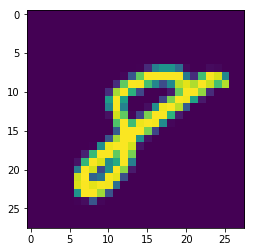

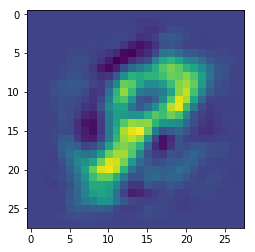

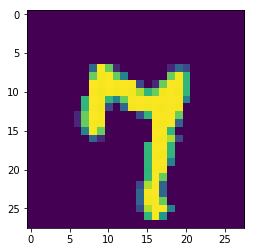

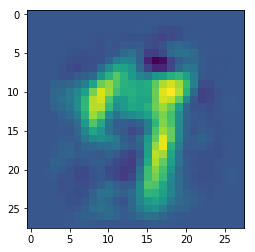

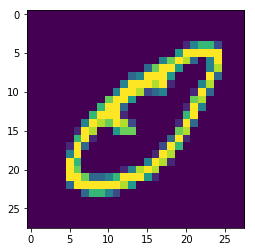

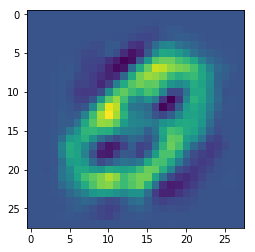

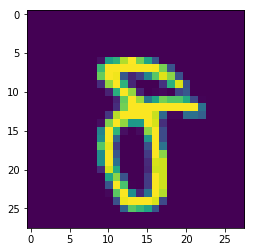

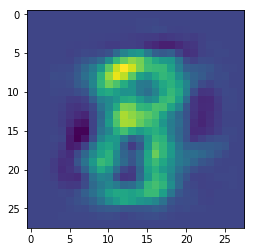

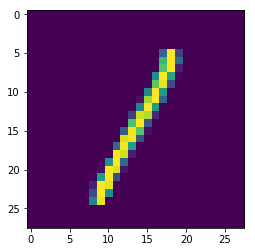

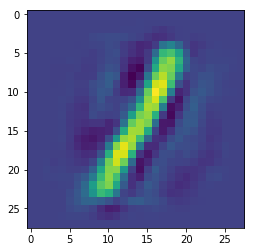

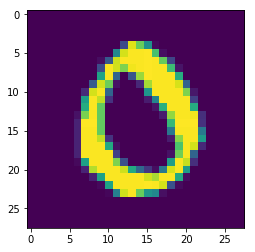

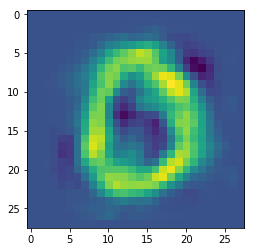

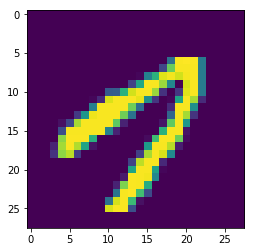

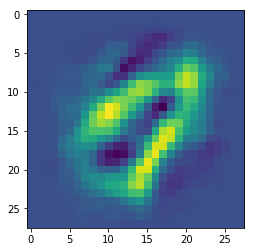

In [327]:
dat = d[1000:1020]
print(dat.shape)
latents = m2.get_latents(dat)
print(type(latents))
print(len(latents))
l = latents[0]
print(l.shape)
#for vals in zip(*latents):
 #   print([e[0] for e in vals])
    
preds = m2.get_predictions_from_latents(latents)
print(type(preds))
print(len(preds))
for q,p in zip(dat,preds):
    plt.imshow(np.reshape(q, (28,28)))
    plt.show()
    plt.imshow(np.reshape(p, (28,28)))
    plt.show()

(784, 20)


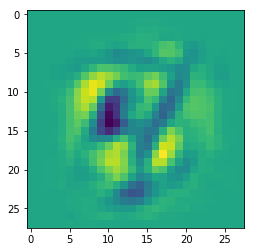

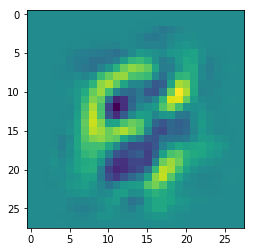

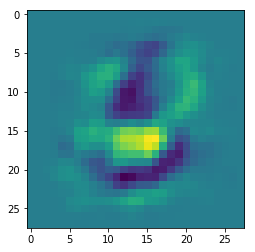

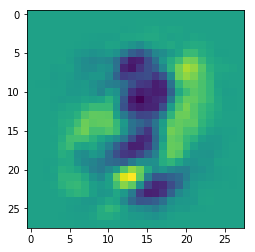

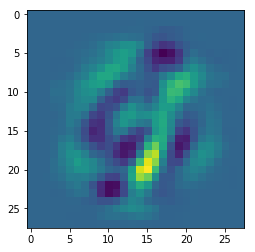

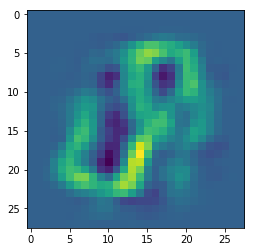

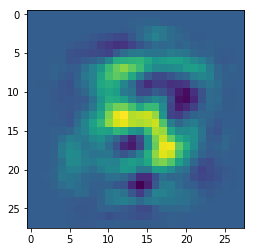

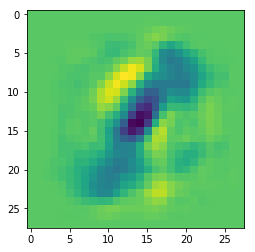

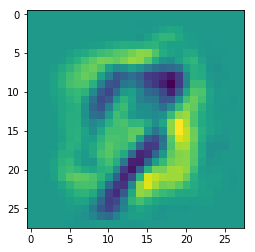

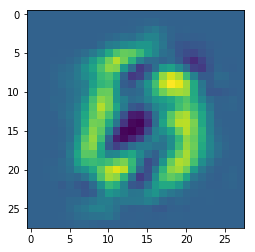

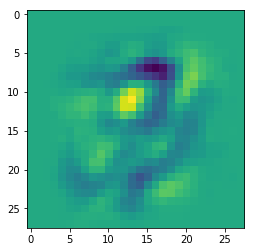

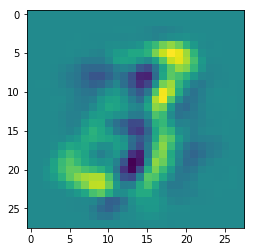

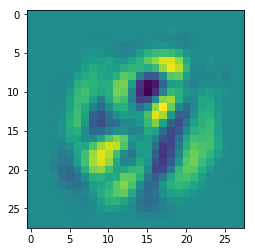

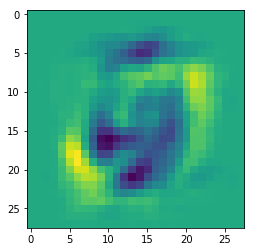

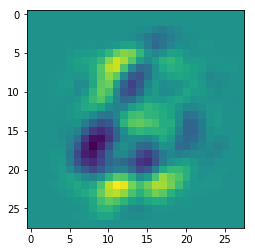

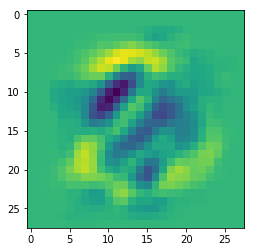

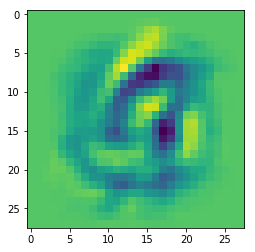

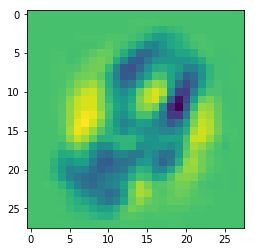

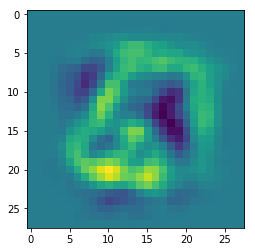

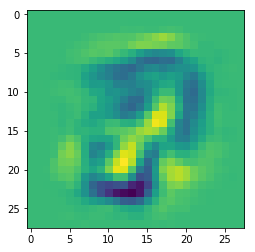

In [329]:

w = m2.layers[0].weights
print(w.shape)
for i in range(w.shape[1]):
    we = w[:,i]
    plt.imshow(np.reshape(we, (28,28)))
    plt.show()

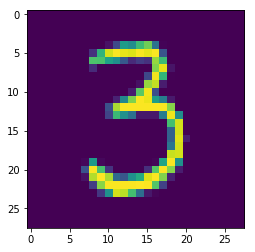

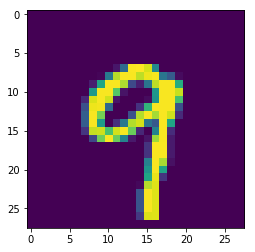

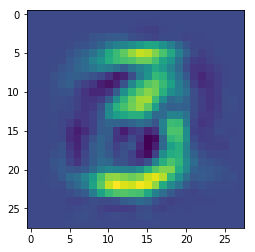

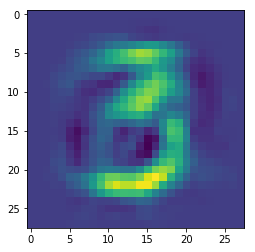

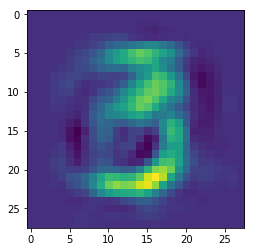

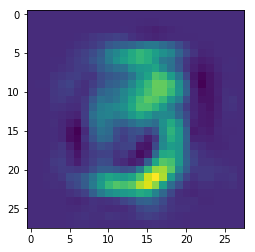

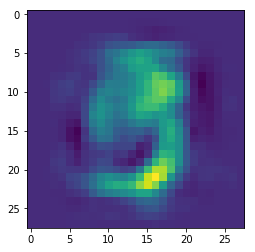

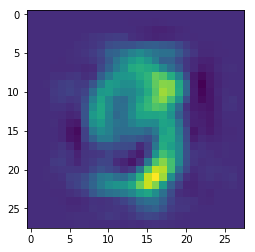

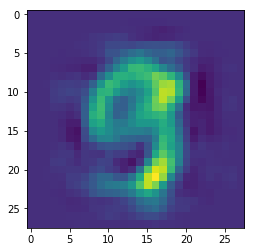

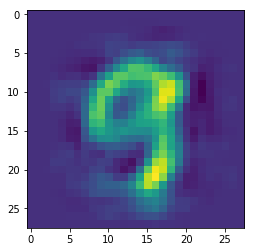

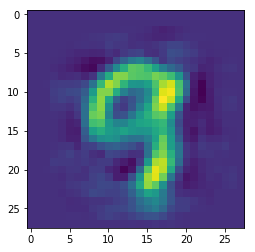

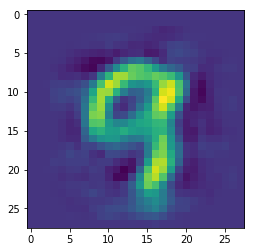

In [338]:
def interpolate(l1, l2, num_steps):
    interps = []
    diff = (l2 - l1) / num_steps
    for i in range(num_steps):
        latent = l1 + (i * diff)
        for i in range(m2.convergence_runs):
            m2.upwards[0] = np.reshape(latent, (784,1))
            for j,layer in enumerate(m2.layers):
                #print("Layer : " + str(j))
                up, down, weights, preds, pes = layer.run(m2.upwards[j], m2.downwards[j+1], training=False)
                m2.upwards[j+1] = up
                m2.downwards[j] = down 
        interps.append(np.copy(m2.layers[-1].latents))
    return interps


d1 = d[50]
d2 = d[170]
plt.imshow(np.reshape(d1, (28,28)))
plt.show()
plt.imshow(np.reshape(d2, (28,28)))
plt.show()
i = 4

interps = interpolate(d1,d2,10)
preds = m2.get_predictions_from_latents(interps)
for pred in preds:
    plt.imshow(np.reshape(pred, (28,28)))
    plt.show()
            
    

(60000, 784)
(9999, 784)
Starting epoch: 0
Starting epoch: 1
Starting epoch: 2
Starting epoch: 3
Starting epoch: 4
Starting epoch: 5
Starting epoch: 6
Starting epoch: 7
Starting epoch: 8
Starting epoch: 9


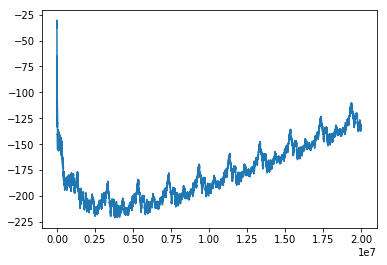

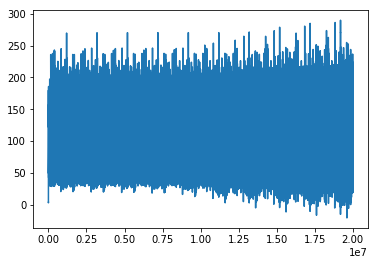

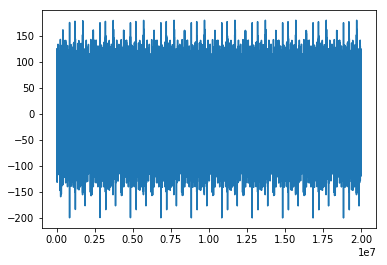

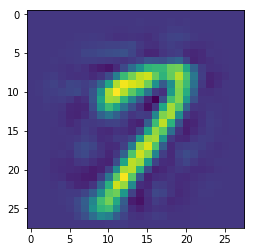

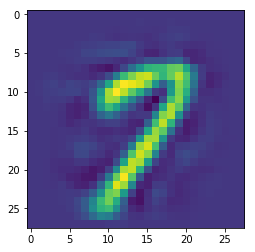

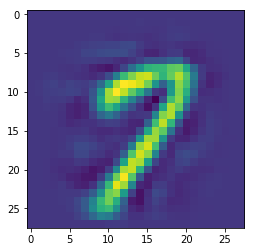

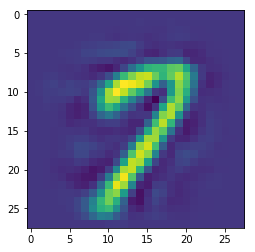

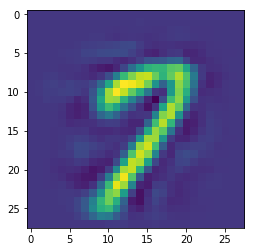

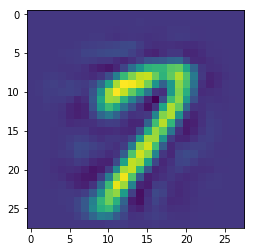

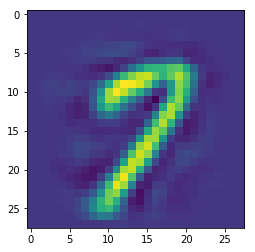

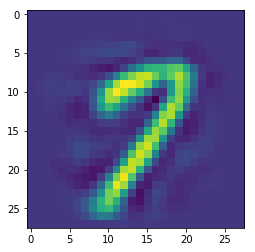

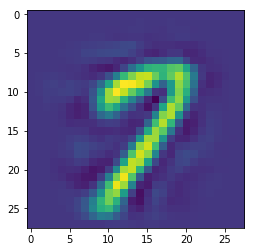

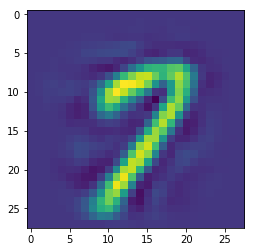

In [340]:
print(d.shape)
print(d[1:10000].shape)
m2 = Model(d[1:10000], 10)
l1 = Layer(0.01, 784, 50, input_layer=True)
l2 = Layer(0.01, 50,1)
m2.add(l1)
m2.add(l2)
m2.initialize()
m2.train()
m2.plot()

10
(784, 1)
(784, 1)
(784,)


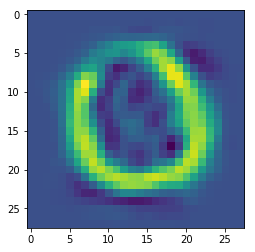

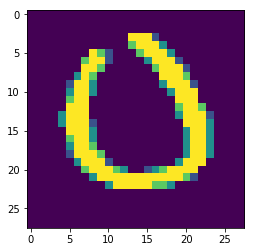

(784, 1)
(784,)


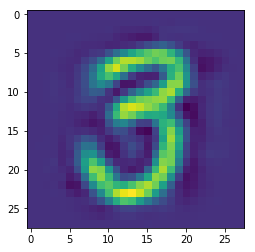

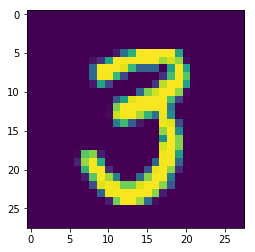

(784, 1)
(784,)


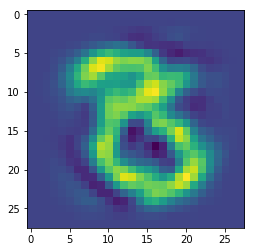

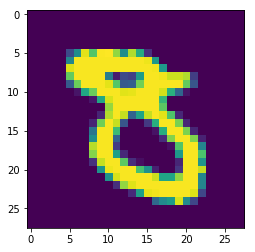

(784, 1)
(784,)


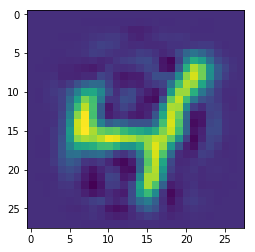

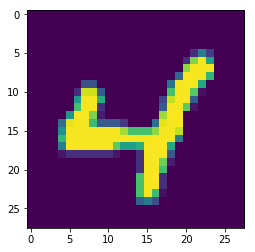

(784, 1)
(784,)


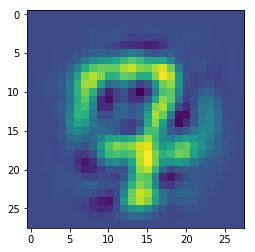

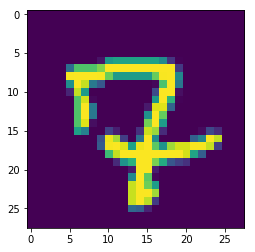

(784, 1)
(784,)


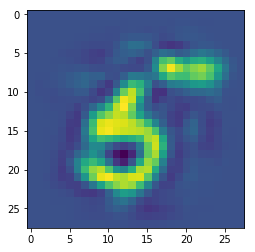

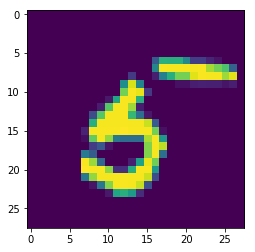

(784, 1)
(784,)


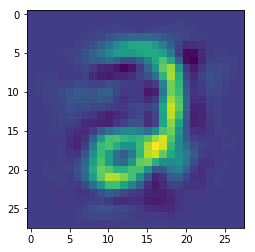

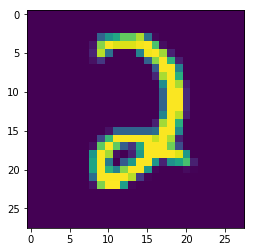

(784, 1)
(784,)


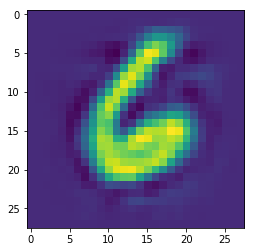

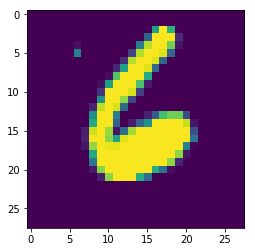

(784, 1)
(784,)


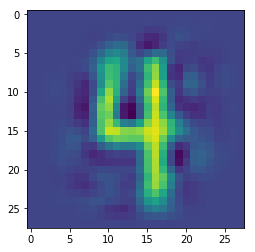

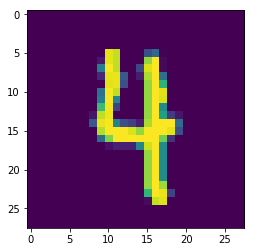

(784, 1)
(784,)


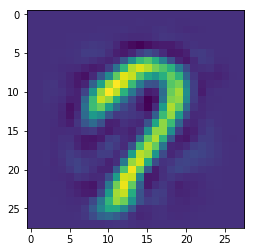

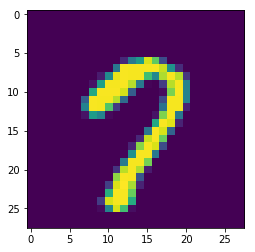

In [351]:
data = d[10010:10020]
latents = m2.get_latents(data)
preds = m2.get_predictions_from_latents(latents)
print(len(preds))
print(preds[0].shape)
for (pred, e) in zip(preds, data):
    print(pred.shape)
    print(e.shape)
    plt.imshow(np.reshape(pred, (28,28)))
    plt.show()
    plt.imshow(np.reshape(e,(28,28)))
    plt.show()

(784, 50)


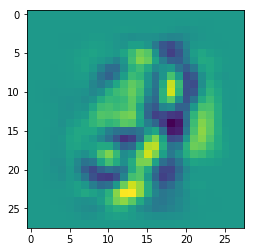

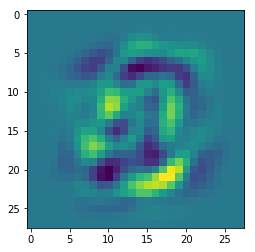

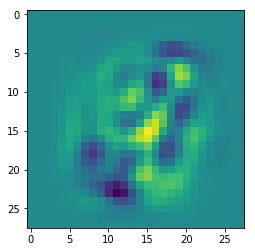

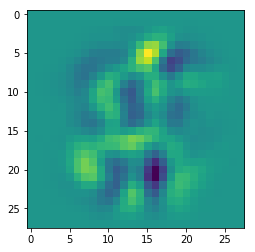

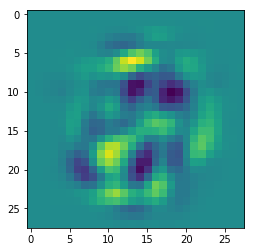

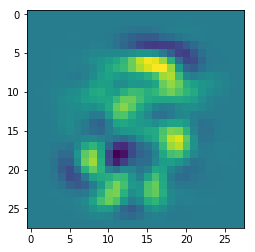

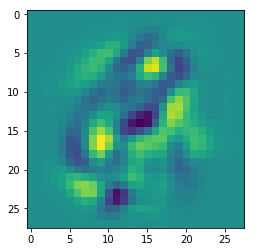

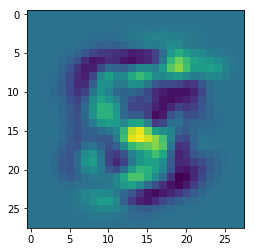

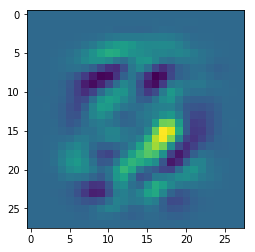

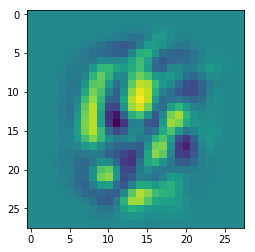

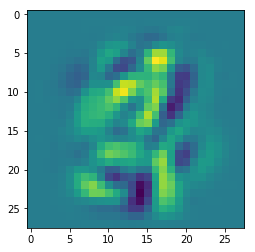

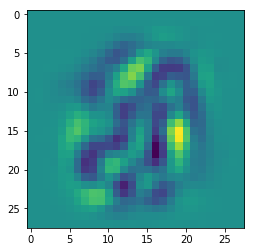

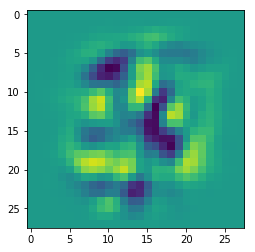

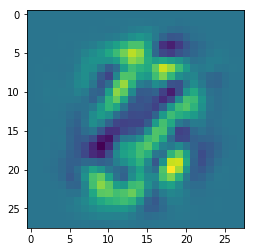

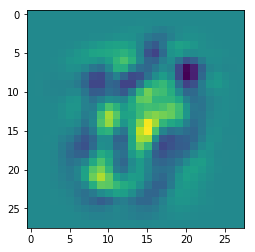

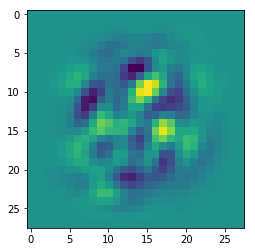

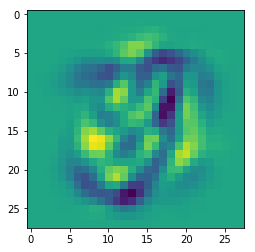

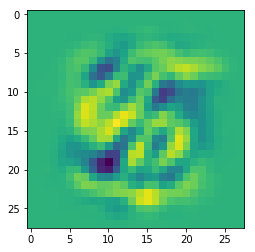

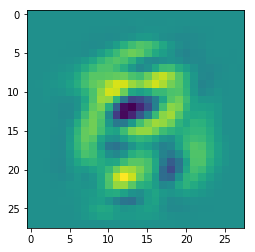

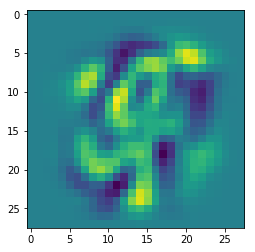

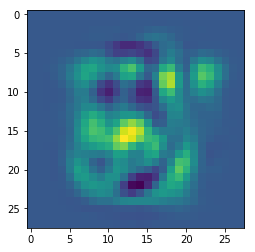

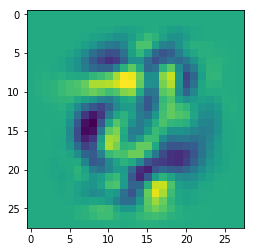

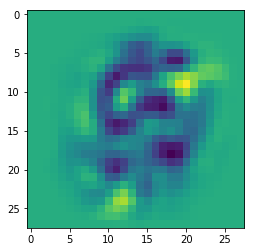

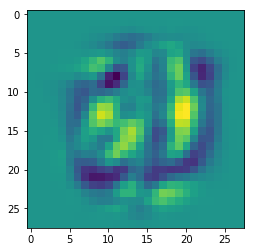

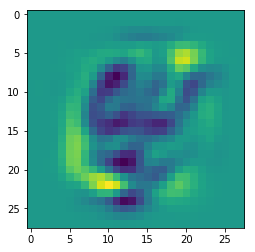

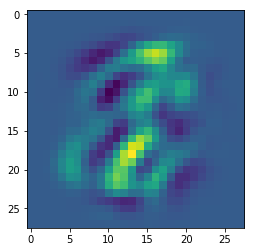

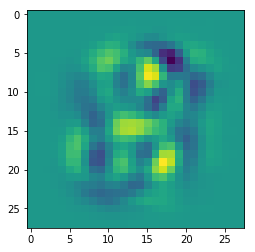

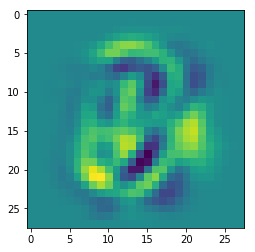

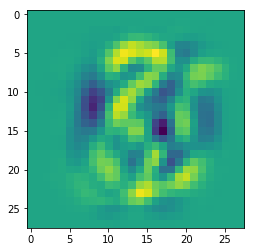

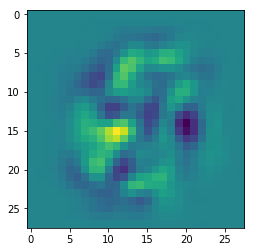

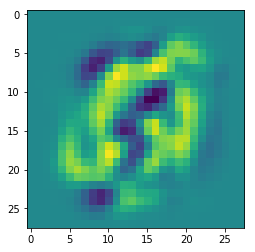

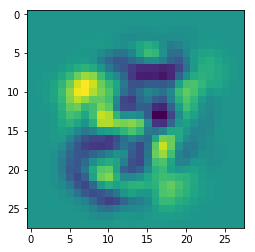

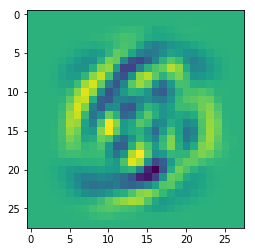

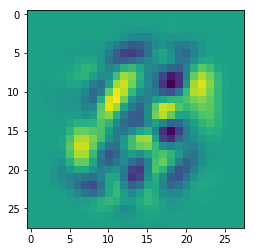

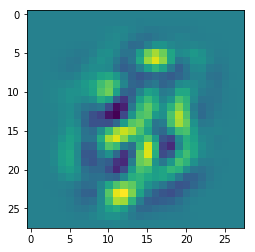

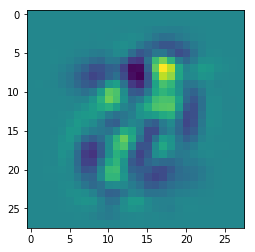

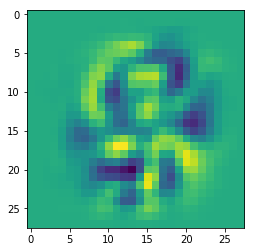

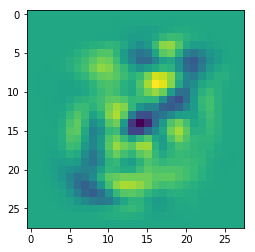

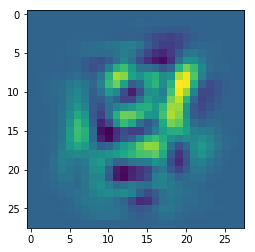

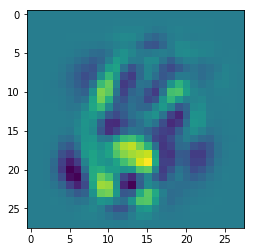

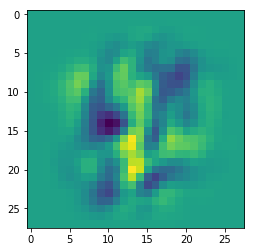

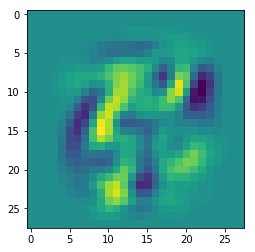

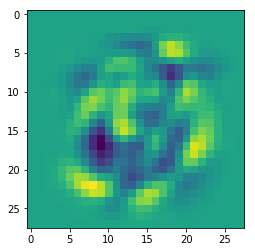

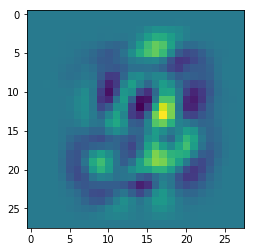

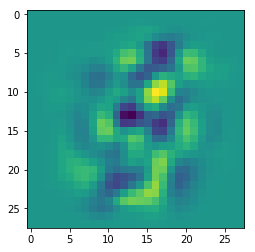

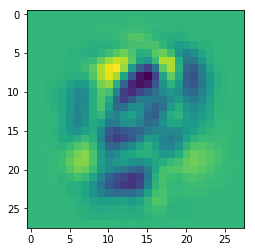

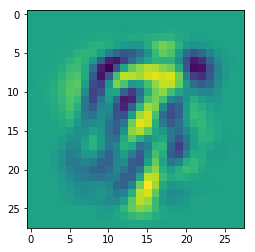

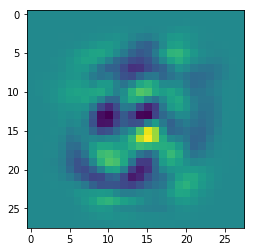

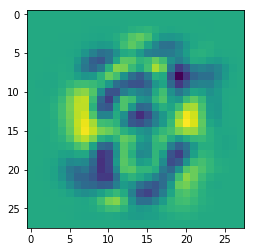

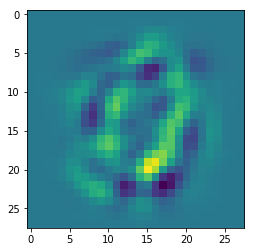

In [353]:
ws = m2.layers[0].weights
print(ws.shape)
for i in range(ws.shape[1]):
    plt.imshow(np.reshape(ws[:,i], (28,28)))
    plt.show()
    

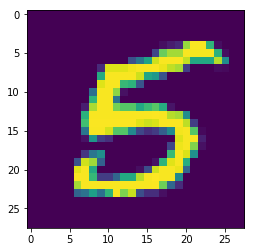

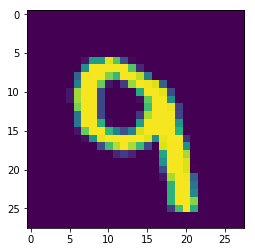

AttributeError: 'Model' object has no attribute 'interpolate'

In [354]:
d1 = d[20000]
d2 = d[20001]
plt.imshow(np.reshape(d1, (28,28)))
plt.show()
plt.imshow(np.reshape(d2, (28,28)))
plt.show()

interps = m2.interpolate(d1, d2, 10)
preds = m2.get_predictions_from_latents(interps)
for pred in preds:
    plt.imshow(np.reshape(pred, (28,28)))
    plt.show()
    